# The Second Part of the Assignment of IDS 2020-2021
In this Jupyter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

It is not needed that the group members be the same as the group members of the first part of the assignment, <font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student's matriculation number is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the datasets. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and matriculation numbers:
    
    1. Amit Mudgal 
    
    2. Maciej Combrzynski-Nogala 
    
    3. Tae Keun Jeong 

In [1]:
#importing libraries
import random
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.metrics as metrics
import nltk
import string
import csv
import re
import gensim
import multiprocessing
from tqdm import tqdm
from nltk.corpus import stopwords    
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
from gensim.parsing.preprocessing import stem_text, strip_multiple_whitespaces,strip_punctuation, preprocess_string, remove_stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Comberek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Comberek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Question 1 - Data Preprocessing and Data Quality (15 points)

(a) Carry out the following preprocessing steps before starting the analysis:

Select 90% of dataset <b>dataPrepViz.csv</b> for this assignment by random sampling. Use the matriculation number of one of the group members as seed. Rename the sampled dataset to <b>dataPrepViz_sampled</b> and export it as CSV.

 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

Use this dataset <b>dataPrepViz_sampled</b> as starting point for Question 1 and Question 2. Then apply further modifications as specified in the those questions.

In [2]:
dataPrepViz_sampled = pd.read_csv('Datasets/dataPrepViz.csv', delimiter=';', skiprows=0, low_memory=False)
dataPrepViz_sampled = dataPrepViz_sampled.sample(frac=0.9, random_state=414759)
print(dataPrepViz_sampled.head())

#save the genrated csv file
dataPrepViz_sampled.to_csv('Exported_csv/dataPrepViz_sampled.csv')


   geographic_group     country  children_per_woman_total_fertility  \
36         Americas     Ecuador                                2.51   
5   Western Pacific   Australia                              -10.00   
86              NaN  Montenegro                              -10.00   
2            Africa     Algeria                              -10.00   
6            Europe     Austria                                1.49   

    child_mortality_0_5_year_olds_dying_per_1000_born  \
36                                              15.10   
5                                                3.87   
86                                               3.46   
2                                               24.90   
6                                                3.71   

    co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
36                             2.63                             32.0   
5                             16.80                             79.0   
86            

Create new dataset <b>data1</b> by removing the feature 'geographic_group' from <b>dataPrepViz_sampled</b>. Use this <b>data1</b> dataset for Question 1.

In [3]:
# dropping column 'geographic_group' from dataset 
data1 = dataPrepViz_sampled.drop('geographic_group', 1)
data1.head()

country  children_per_woman_total_fertility  \
36     Ecuador                                2.51   
5    Australia                              -10.00   
86  Montenegro                              -10.00   
2      Algeria                              -10.00   
6      Austria                                1.49   

    child_mortality_0_5_year_olds_dying_per_1000_born  \
36                                              15.10   
5                                                3.87   
86                                               3.46   
2                                               24.90   
6                                                3.71   

    co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
36                             2.63                             32.0   
5                             16.80                             79.0   
86                             3.57                             44.0   
2                              3.80                             36.0   
6                              7.70                             76.0   

    life_expectancy_years  vccin_effect_dag  
36                   76.6             0.021  
5                    82.5             0.043  
86                   76.4               NaN  
2                    77.1             0.078  
6                    81.5             0.118

(b) We want to get a first impression of the data. To achieve this, compute and show the following:

- the column names (the names of the features)
- the data type of each feature
- for categorical features: the number of classes and the value of the most frequent class
- for numerical features: the mean, standard deviation, minimum and maximum

In [4]:
# Create a DataFrame object
print("Column Names:", data1.columns)
print('Data type of each column of Dataframe :')
print(data1.dtypes)
# number of classes in country column
print("Number of classes in country column:", data1.country.nunique())
# number of most frquent item in country column
print("Most Frequent item in Categorical Items:", data1.country.value_counts().max())

Column Names: Index(['country', 'children_per_woman_total_fertility',
       'child_mortality_0_5_year_olds_dying_per_1000_born',
       'co2_emissions_tonnes_per_person', 'corruption_perception_index_cpi',
       'life_expectancy_years', 'vccin_effect_dag'],
      dtype='object')
Data type of each column of Dataframe :
country                                               object
children_per_woman_total_fertility                   float64
child_mortality_0_5_year_olds_dying_per_1000_born    float64
co2_emissions_tonnes_per_person                      float64
corruption_perception_index_cpi                      float64
life_expectancy_years                                float64
vccin_effect_dag                                     float64
dtype: object
Number of classes in country column: 126
Most Frequent item in Categorical Items: 1


**Explantion:** <br> We have only one categorical column "Country" and each country appears only once that's the reason why the most frequent item as 1.

In [5]:
# mean, standard deviation, minimum and maximum
data1.describe().T.drop(["count","25%","50%","75%"],axis=1)

mean        std  \
children_per_woman_total_fertility                 -0.454127   5.724687   
child_mortality_0_5_year_olds_dying_per_1000_born  28.781746  30.485312   
co2_emissions_tonnes_per_person                     4.547888   4.727880   
corruption_perception_index_cpi                    44.584000  20.056044   
life_expectancy_years                              73.137302   7.216667   
vccin_effect_dag                                    0.087049   0.051284   

                                                       min     max  
children_per_woman_total_fertility                -10.0000    7.29  
child_mortality_0_5_year_olds_dying_per_1000_born   2.2000  125.00  
co2_emissions_tonnes_per_person                     0.0367   24.10  
corruption_perception_index_cpi                    11.0000   91.00  
life_expectancy_years                              55.8000   84.40  
vccin_effect_dag                                    0.0000    0.26

(c) For each feature, provide a histogram (with at least 10 bins each) showing the value distribution. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

Briefly explain the issues you identified.

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

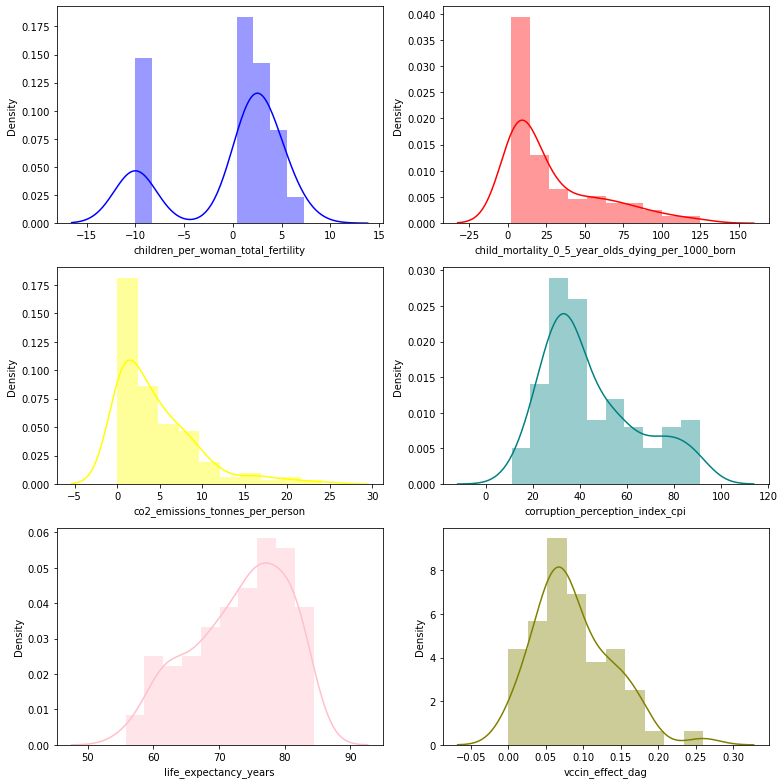

In [6]:
# creating histogram for each feature

f, axes = plt.subplots(3, 2, figsize=(11, 11), sharex='none')
sns.distplot( data1["children_per_woman_total_fertility"] , color="blue", label="children_per_woman_total_fertility", ax=axes[0, 0], bins=10)
sns.distplot( data1["child_mortality_0_5_year_olds_dying_per_1000_born"] , color="red", label="child_mortality", ax=axes[0, 1], bins=10)
sns.distplot( data1["co2_emissions_tonnes_per_person"] , color="yellow", label="Co2_per_person", ax=axes[1, 0], bins=10)
sns.distplot( data1["corruption_perception_index_cpi"] , color="teal", label="corruption_perception_index_cpi",ax=axes[1,1], bins=10)
sns.distplot( data1["life_expectancy_years"] , color="pink", label="life_expectancy_years", ax=axes[2, 0], bins=10)
sns.distplot( data1["vccin_effect_dag"] , color="olive", label="vccin_effect_dag", ax=axes[2, 1], bins=10)

f.tight_layout()
plt.savefig('Exported_viz/histogram_1c.png')
plt.show()


**Explanation:**
<br> According to our observations we noticed that column "children_per_woman_total_fertility" suffers from data inconsistencies. It seems that -10 is some sort of placeholder that has been used to indicate that there is "no data" about this statistic in certain countries. 

(d) Substitute all implausible values as missing data (numpy.nan). Show the scatter matrix of the resulting dataset.

In [7]:
#Replacing -10 (implausible values) with NaN
data1['children_per_woman_total_fertility'] = data1['children_per_woman_total_fertility'].replace(-10, np.nan)
print(data1.head())

       country  children_per_woman_total_fertility  \
36     Ecuador                                2.51   
5    Australia                                 NaN   
86  Montenegro                                 NaN   
2      Algeria                                 NaN   
6      Austria                                1.49   

    child_mortality_0_5_year_olds_dying_per_1000_born  \
36                                              15.10   
5                                                3.87   
86                                               3.46   
2                                               24.90   
6                                                3.71   

    co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
36                             2.63                             32.0   
5                             16.80                             79.0   
86                             3.57                             44.0   
2                              3.80         

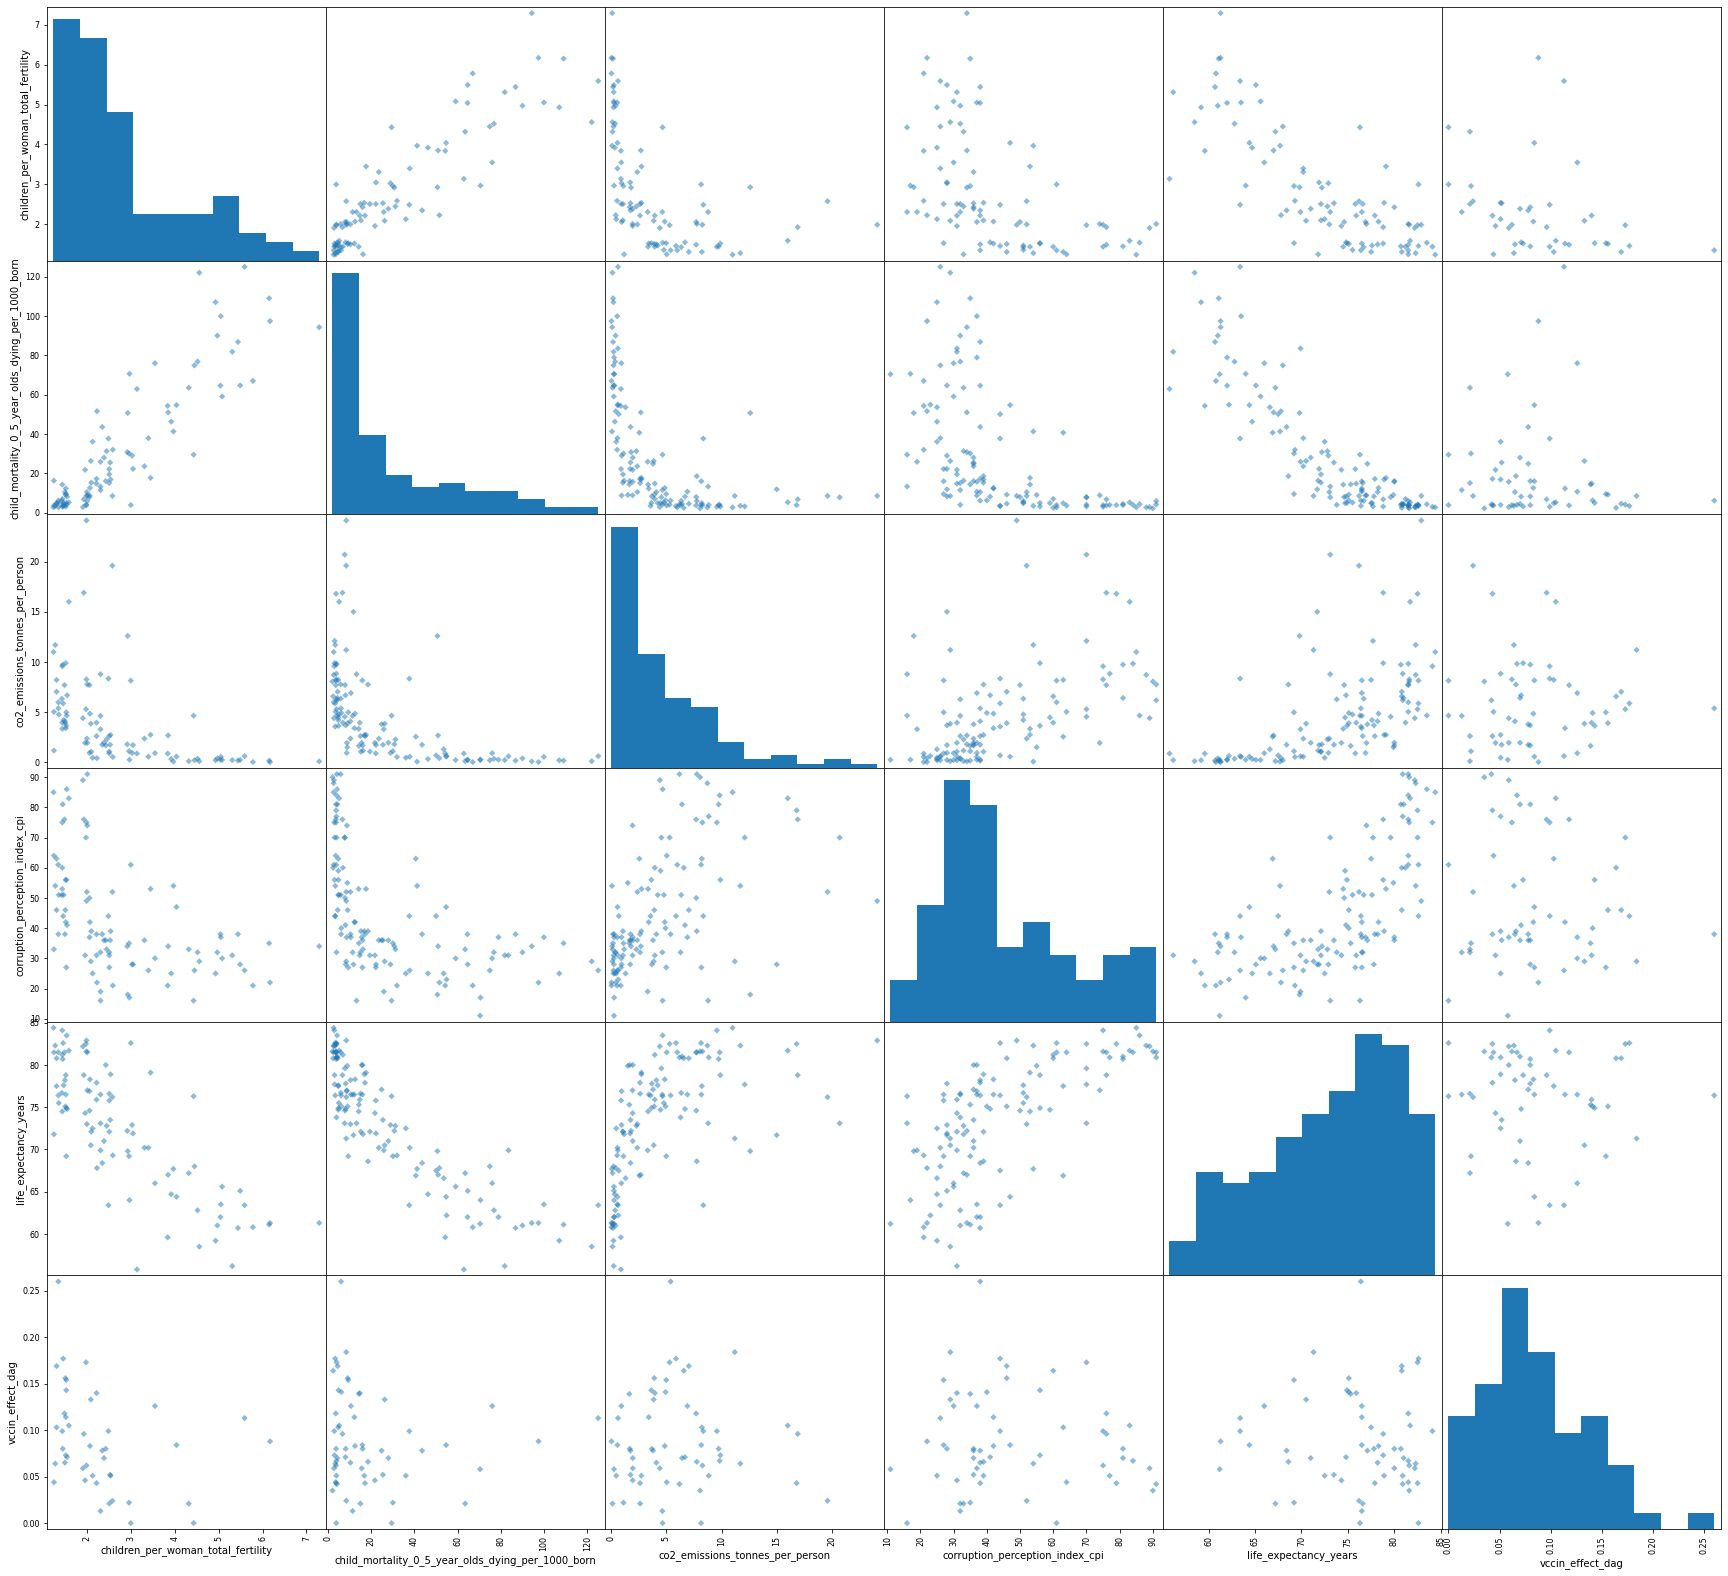

In [8]:
# scatter matrix of after substituion of implausible values
pd.plotting.scatter_matrix(data1, figsize = [30,28], s=20, marker = 'D');
plt.savefig('Exported_viz/scattmrx_1d.png')

(e) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced. 

In this question, consider implausible values to be the ones identified in part (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Based on the information obtained in the previous subtasks of this question, choose a strategy for handling all missing/implausible values, such that
    - for one feature, you delete all data rows that include a missing value.
    - for one feature, you replace all missing values by the median value.
    - for one feature, you impute the values based on other, continous features using a regression classifier.
    Create a cleaned dataset with all those values handled accordingly. 
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned dataset. Also print the total number of data rows.
    
    4) Motivate and explain the choices you made in 2). Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.
 
*Hint: There might not be an obvious choice for the best strategy. In this case, sound reasoning based on correct observations is more important than the decision itself.*

In [9]:
# computing  mean, standard deviation, minimum and maximum
print(data1.describe().T.drop(["count","25%","50%","75%"],axis=1))
rows = data1.shape[0] 
# total number of data rows 
print("Number of total data rows :", rows)

                                                        mean        std  \
children_per_woman_total_fertility                  2.795532   1.421344   
child_mortality_0_5_year_olds_dying_per_1000_born  28.781746  30.485312   
co2_emissions_tonnes_per_person                     4.547888   4.727880   
corruption_perception_index_cpi                    44.584000  20.056044   
life_expectancy_years                              73.137302   7.216667   
vccin_effect_dag                                    0.087049   0.051284   

                                                       min     max  
children_per_woman_total_fertility                  1.2400    7.29  
child_mortality_0_5_year_olds_dying_per_1000_born   2.2000  125.00  
co2_emissions_tonnes_per_person                     0.0367   24.10  
corruption_perception_index_cpi                    11.0000   91.00  
life_expectancy_years                              55.8000   84.40  
vccin_effect_dag                                    0.0000  

In [10]:
#checking which column's consist of Nan Values
print("Column's that consist of Nan Values:\n", data1.isna().any())
print("number of total Nan values :", data1.isna().values.sum())


Column's that consist of Nan Values:
 country                                              False
children_per_woman_total_fertility                    True
child_mortality_0_5_year_olds_dying_per_1000_born    False
co2_emissions_tonnes_per_person                      False
corruption_perception_index_cpi                       True
life_expectancy_years                                False
vccin_effect_dag                                      True
dtype: bool
number of total Nan values : 98


In [11]:
#selecting colums that contains immplausible data
missing_columns = ["children_per_woman_total_fertility", "corruption_perception_index_cpi", "vccin_effect_dag"]

In [12]:
#this function replace the missing values with some random observed values of the variable.
def random_imputation(data1, feature):
    number_missing = data1[feature].isnull().sum()
    observed_values = data1.loc[data1[feature].notnull(), feature]
    data1.loc[data1[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return data1

In [13]:
# using for loop all colums containing implausible values 
for feature in missing_columns:
    data1[feature + '_imp'] = data1[feature]
    data1 = random_imputation(data1, feature)

In [14]:
cleaned_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

# replacing the implausible data with predicted values using regression 
for feature in missing_columns:    
    cleaned_data["Det" + feature] = data1[feature + "_imp"]
    parameters = list(set(data1.columns) - set(missing_columns) - {feature + '_imp'})
    parameters.remove('country')
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = data1[parameters], y = data1[feature + '_imp'])
    
    # preserving the index of the missing data from the original dataframe
    cleaned_data.loc[data1[feature].isnull(), "Det" + feature] = model.predict(data1[parameters])[data1[feature].isnull()]

In [15]:
# printing cleaned data 
print(cleaned_data.describe().T.drop(["count","25%","50%","75%"],axis=1))
print(data1.describe().T.drop(["count","25%","50%","75%"],axis=1))


                                            mean        std    min    max
Detchildren_per_woman_total_fertility   2.690876   1.311680   1.24   7.29
Detcorruption_perception_index_cpi     44.346236  20.153163  11.00  91.00
Detvccin_effect_dag                     0.086307   0.036073   0.00   0.26
                                                        mean        std  \
children_per_woman_total_fertility                  2.795532   1.421344   
child_mortality_0_5_year_olds_dying_per_1000_born  28.781746  30.485312   
co2_emissions_tonnes_per_person                     4.547888   4.727880   
corruption_perception_index_cpi                    44.584000  20.056044   
life_expectancy_years                              73.137302   7.216667   
vccin_effect_dag                                    0.087049   0.051284   
children_per_woman_total_fertility_imp              2.690476   1.374869   
corruption_perception_index_cpi_imp                44.785714  20.103575   
vccin_effect_dag_imp         

In [16]:
#Assigning cleaned values into the data frame
data1[missing_columns] = cleaned_data

#export into csv
data1.to_csv('Exported_csv/data1.csv')

**Explanation:** <br>
We think that removing rows to handle missing or implausible data is not the right choice here, as this method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. And removing the data will lead to loss of information

We think that using Median is also not good strategy, it replaces missing values with the median of existing values for a given feature. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns but it still suffers from imputing the approximations. It adds variance, bias and works poorly compared to other, more sophisticated methods.

We decided to use Regression Imputation as we found its a better one such method in which we estimate the missing values by Regression using other variables as the parameters In Deterministic Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable. Although this model might suffer from some bias or noise as predicted value lie alone the regression hyperplane where it might have contained some noise. But comparing to other models, mentioned above, it still perfoms better.

## Question 2 - Data Preprocessing and Advanced Visualization (15 points)

For this question, use the <b>dataPrepViz_sampled</b> dataset you created in Q1, part (a).

(a) To create a suitable input for the following questions, modify the dataset as listed below:

    1) remove rows that contain negative values
    2) remove all rows that contain missing values

In [17]:
#get all column names
column_names = list(dataPrepViz_sampled.columns)

#dropna method drops all NaN values in each row from subset(corresponding columns)
dataPrepViz_sampled.dropna(subset = column_names, inplace=True)

#iterate every column
for col in column_names:
    
    #check if the column values are float64 is_numeric_dtype(df['B'])
    if is_numeric_dtype(dataPrepViz_sampled[col]):
        
        #if the column type == numeric, check if the value below 0, then drop
        #inplace = True -> update the row of the DataFrame
        #inplace = False -> It returns the row object, no update
        dataPrepViz_sampled.drop(dataPrepViz_sampled.loc[dataPrepViz_sampled[col] < 0].index, inplace=True)

#export dataPrepViz_sampled to csv
dataPrepViz_sampled.to_csv("Exported_csv/dataPrepViz_sampled_2a.csv", index = True)

dataPrepViz_sampled.head()

geographic_group       country  children_per_woman_total_fertility  \
36                Americas       Ecuador                                2.51   
6                   Europe       Austria                                1.49   
87   Eastern Mediterranean       Morocco                                2.53   
110  Eastern Mediterranean  Saudi Arabia                                2.58   
96                  Africa       Nigeria                                5.59   

     child_mortality_0_5_year_olds_dying_per_1000_born  \
36                                               15.10   
6                                                 3.71   
87                                               25.50   
110                                               8.54   
96                                              125.00   

     co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
36                             2.630                             32.0   
6                              7.700                             76.0   
87                             1.760                             36.0   
110                           19.600                             52.0   
96                             0.627                             26.0   

     life_expectancy_years  vccin_effect_dag  
36                    76.6             0.021  
6                     81.5             0.118  
87                    73.5             0.052  
110                   76.2             0.024  
96                    63.4             0.113

(b) For this subtask remove the feature 'country' from the data. Create four parallel coordinate plots that visualize the relation between the numerical attributes for all geographic groups.

    1) For the first parallel coordinate plot, use the values unchanged.
    
    2-4) For the remaining 3 parallel coordinate plots, first normalize all numerical attributes by mapping them individually to the interval between 0 and 1, that is, apply Min-max normalization. Draw the three plots with different orderings of the features (randomized or chosen by interest).

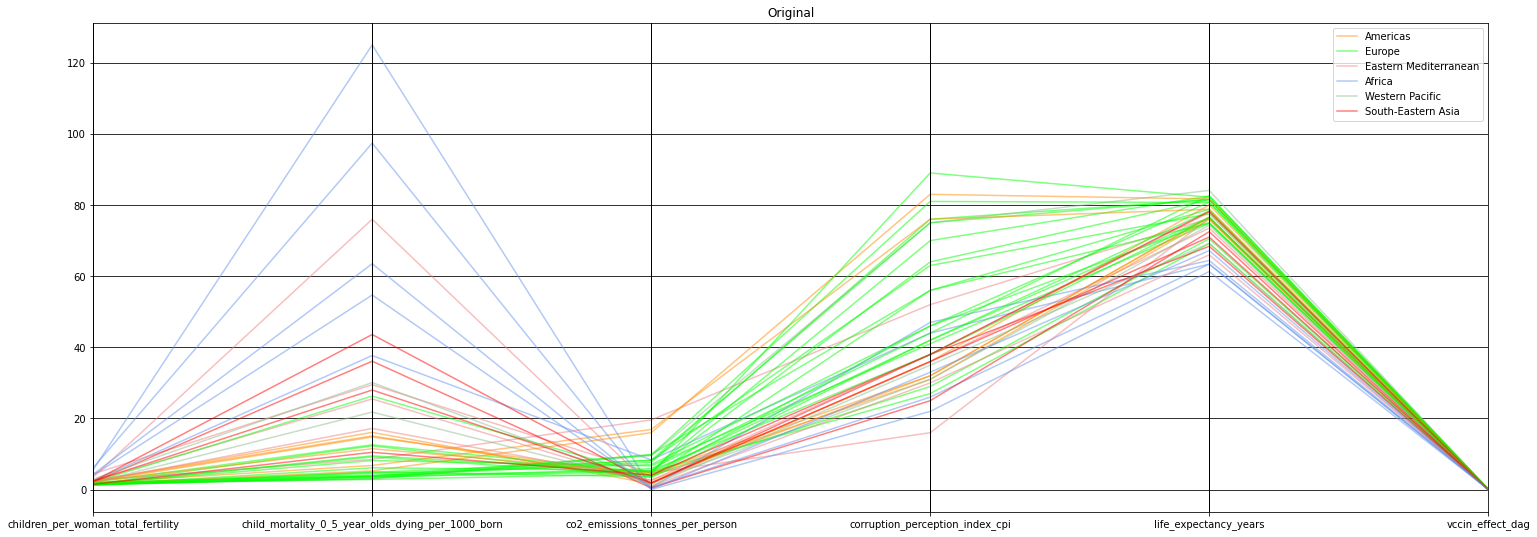

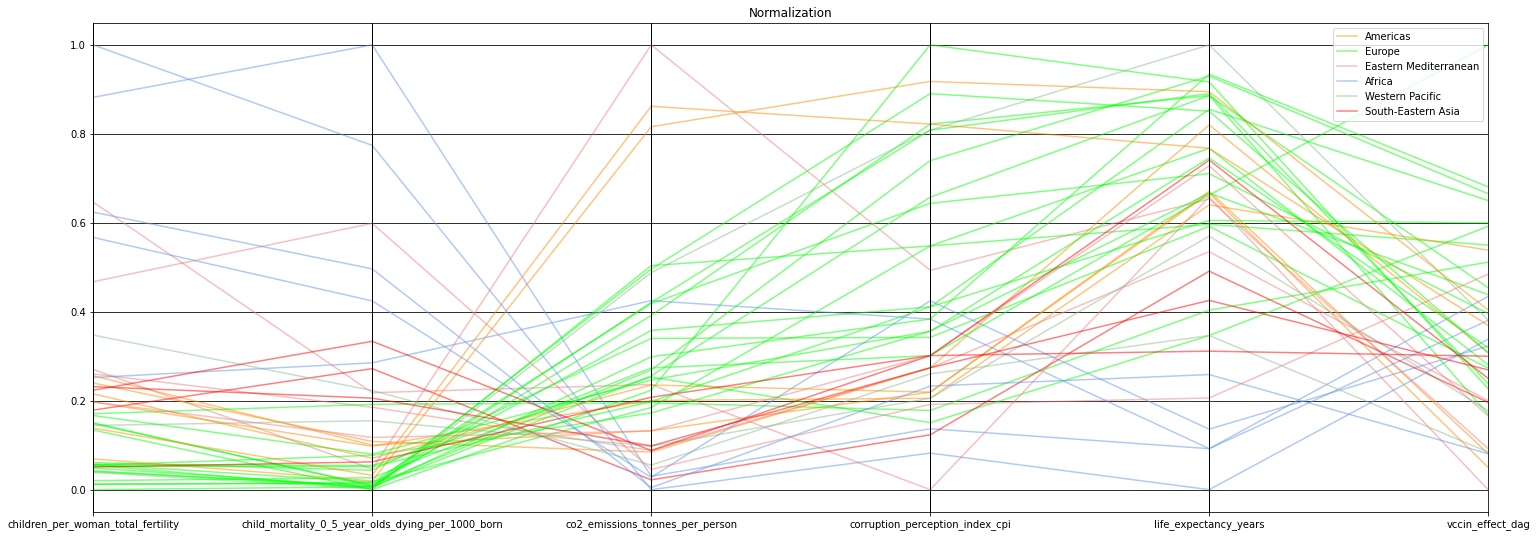

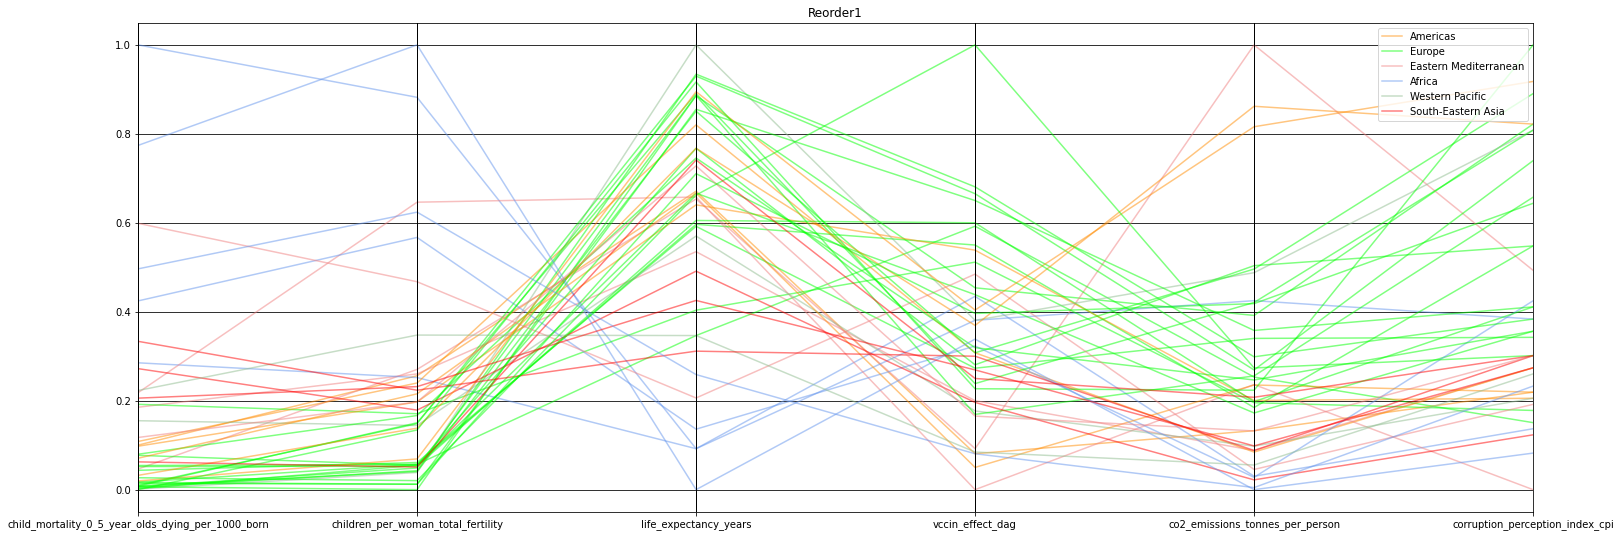

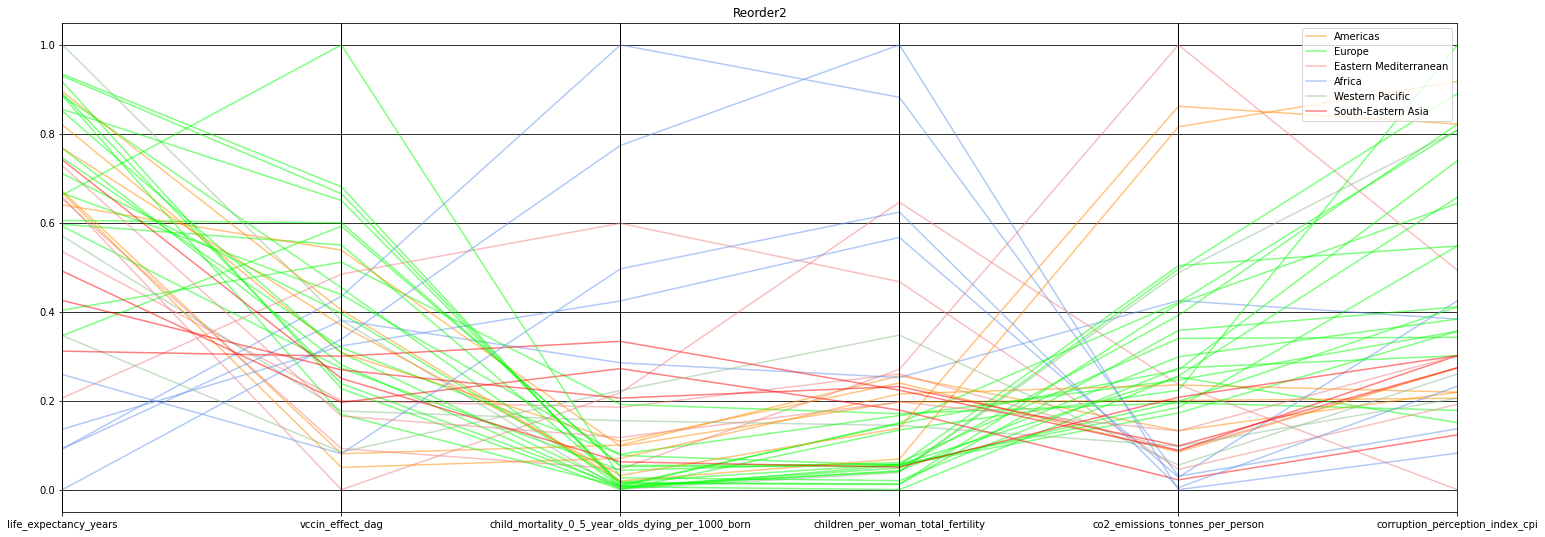

In [18]:
#drop the feature 'country'
dataPrepViz_sampled = dataPrepViz_sampled.drop(columns='country')

#copy the dataframe to keep the oiginal and represent the plot
dataPrepViz_sampled_origin = dataPrepViz_sampled.copy()

with plt.style.context(("grayscale")):
    fig = plt.figure(figsize=(25,9))
    fig.set_facecolor("w")
    parallel_coordinates(dataPrepViz_sampled, 'geographic_group',
                                     color=["darkorange", "lime","lightcoral","cornflowerblue","darkseagreen","red"],
                                     alpha = 0.5)


    plt.title("Original")
    plt.savefig('Exported_viz/parallel-coordinate-plot-unchanged.png')

column_names = list(dataPrepViz_sampled.columns)

#iterate every column
for col in column_names:
    
    #check if the column values are float64 is_numeric_dtype(df['B'])
    if is_numeric_dtype(dataPrepViz_sampled[col]):
        
        #if the column type == numeric, 
        #get the cell value, max, min value of the corresponding column
        # normalize and update the cell
        dataPrepViz_sampled.drop(dataPrepViz_sampled.loc[dataPrepViz_sampled[col] < 0].index, inplace=True)
        
        #get the max value of each column
        max_value = dataPrepViz_sampled[col].max()
        #get the min value of each column
        min_value = dataPrepViz_sampled[col].min()
        
        #normalization of the corresponding column
        dataPrepViz_sampled[col] = dataPrepViz_sampled[col].apply(lambda x: (x - min_value)/(max_value - min_value))

#copy 2 times to shuffle the colums and to plot
dataPrepViz_sampled_copy1 = dataPrepViz_sampled.copy()
dataPrepViz_sampled_copy2 = dataPrepViz_sampled.copy()


#the 1st parallel_coordinate of normalized dataframe
with plt.style.context(("grayscale")):
    fig = plt.figure(figsize=(25,9))
    fig.set_facecolor("w")
    parallel_coordinates(dataPrepViz_sampled, 'geographic_group',
                                     color=["darkorange", "lime","lightcoral","cornflowerblue","darkseagreen","red"],
                                     alpha = 0.5)


    plt.title("Normalization")
    plt.savefig('Exported_viz/parallel-coordinate-plot-normalized.png')

#to substitute variables a,b,c,d,e,f with each column with column names
#cols1 is the list of column names
cols1 = list(dataPrepViz_sampled_copy1.columns)   
#to insert index of cols1 corresponding column name into each variable (index of each value from the list)
a, b, c, d, e, f = cols1.index('children_per_woman_total_fertility'), cols1.index('child_mortality_0_5_year_olds_dying_per_1000_born'), cols1.index('co2_emissions_tonnes_per_person'), cols1.index('corruption_perception_index_cpi'), cols1.index('life_expectancy_years'), cols1.index('vccin_effect_dag')
                    
#to shuffle columns
#shuffle the index of column names in the list, and just shuffle the order of column names by chainging the index
#shuffle was done manually
cols1[a], cols1[b], cols1[c], cols1[d], cols1[e], cols1[f] = cols1[b], cols1[a], cols1[e], cols1[f], cols1[c], cols1[d]
dataPrepViz_sampled_copy1 = dataPrepViz_sampled_copy1[cols1]

#plot
with plt.style.context(("grayscale")):
    fig = plt.figure(figsize=(25,9))
    fig.set_facecolor("w")
    parallel_coordinates(dataPrepViz_sampled_copy1, 'geographic_group',
                                     color=["darkorange", "lime","lightcoral","cornflowerblue","darkseagreen","red"],
                                     alpha = 0.5)


    plt.title("Reorder1")
    plt.savefig('Exported_viz/parallel-coordinate-plot-reordered1.png')
    
cols2 = list(dataPrepViz_sampled_copy2.columns)    
a, b, c, d, e, f = cols2.index('children_per_woman_total_fertility'), cols2.index('child_mortality_0_5_year_olds_dying_per_1000_born'), cols2.index('co2_emissions_tonnes_per_person'), cols2.index('corruption_perception_index_cpi'), cols2.index('life_expectancy_years'), cols2.index('vccin_effect_dag')
                    

#the same shuffle,                     
cols2[a], cols2[b], cols2[c], cols2[d], cols2[e], cols2[f] = cols2[e], cols2[f], cols2[b], cols2[a], cols2[c], cols2[d]
dataPrepViz_sampled_copy2 = dataPrepViz_sampled_copy2[cols2]

#plot
with plt.style.context(("grayscale")):
    fig = plt.figure(figsize=(25,9))
    fig.set_facecolor("w")
    parallel_coordinates(dataPrepViz_sampled_copy2, 'geographic_group',
                                     color=["darkorange", "lime","lightcoral","cornflowerblue","darkseagreen","red"],
                                     alpha = 0.5)


    plt.title("Reorder2")
    plt.savefig('Exported_viz/parallel-coordinate-plot-reordered2.png')
    
plt.show()


(c) For each of the questions 1-3 below:
- Indicate all of your parallel coordinate plots, which are suitable for finding an answer to the question. Explain your selection. 
- If possible, briefly answer the questions.

We answered all questions wrt the last parallel coordinate plot because the last one contains appropriate order of columns.

    1) Is there a correlation between fertility and CO2 emissions? If yes, is it positive or negative? 
    
**Answer:** Yes, In America, Europe, and Eastern Mediterranean Positive, otherwise, negative.(Based on the 4th plot because the both features are just beside)

    2) Is there a correlation between life expectancy and vaccination confidence? If yes, is it positive or negative?
    
**Answer:** Yes, In Africa it is positive; otherwise, negative.(From the 2nd, 3rd and 4th plots shows because the both features are just beside)

    3) Is there a correlation between CO2 emissions and perceived corruption? If yes, is it positive or negative?
    
**Answer:** Yes, In Eastern Mediterranean the correlation is negative, otherwise, it is positive. (In the 3rd and 4th plots, the both features are just beside, thus, it is very easy to see it.)

**Answer:** : Based on the observations, the 3rd and the 4th plots shows these relations very properly

(d) In this subtask we prepare the data for the heat map, which we create in subtask (e). 

The heat map should visualize the vaccination confidence ('vccin_effect_dag') for different combinations of CO2 emissions ('co2_emissions_tonnes_per_person') and fertility ('children_per_woman_total_fertility'). The heatmap should have 40 columns and 40 rows. The shown vaccination confidence value should be the *median* of all values for each combination of CO2 emissions and fertility. 

Do the following steps in preparation:

    1) First, drop all columns that are not needed in this task.

    2) Discretize the CO2 emissions and fertility data into 40 bins each, using equal-width binning.

    3) Group the data by CO2 emissions and fertility, using median to aggregate the values.

In [19]:
#get columns necessary for heatmap to filter unnecessary columns
heatmap_cols = ['vccin_effect_dag', 'children_per_woman_total_fertility', 'co2_emissions_tonnes_per_person']

#iterate all columns and remove unnecessary columns
for col in dataPrepViz_sampled:
    
    #check the column name if not in the list heatmap_cols
    if col not in heatmap_cols:
        
        #then drop the columns
        dataPrepViz_sampled = dataPrepViz_sampled.drop(columns=col)
        
#using KBinsDiscretizer to bin instances equal-widely in 40 bins
discretizer = preprocessing.KBinsDiscretizer(n_bins=40, encode='ordinal', strategy = 'uniform')

dataPrepViz_sampled#<-original dataframe
#discretized_data = discretizer.transform(dataPrepViz_sampled)

#(2)
#copy the original dataframe dataPrepViz_sampled
dataPrepViz_sampled_cop = dataPrepViz_sampled.copy()

#select features to be binned
features = dataPrepViz_sampled_cop[['children_per_woman_total_fertility', 'co2_emissions_tonnes_per_person']]

#fit the features into the discretizer
discretizer.fit(features.values)

#set array of discretized data
discretized_data = discretizer.transform(features.values)

#set these array values into new columns 'children_per_woman_total_fertility_binned', 'co2_emissions_tonnes_per_person_binned' to show each instance is binned
dataPrepViz_sampled_cop[['children_per_woman_total_fertility_binned', 'co2_emissions_tonnes_per_person_binned']] = discretized_data

#(3)
#group the children_per_woman_total_fertility_binned feature by median with method 'groupby' and median()
grouped_fertility = dataPrepViz_sampled_cop.groupby(["children_per_woman_total_fertility_binned"])['children_per_woman_total_fertility'].median()

#group the co2_emissions_tonnes_per_person_binned_binned feature by median with method 'groupby' and median()
grouped_emission = dataPrepViz_sampled_cop.groupby(["co2_emissions_tonnes_per_person_binned"])['co2_emissions_tonnes_per_person'].median()


#convert grouped_fertility(pandas.Series object) to dictionary
fertility_dict = grouped_fertility.to_dict()

#convert grouped_emission(pandas.Series object) to dictionary
emission_dict = grouped_emission.to_dict()

#insert into the new children_per_woman_total_fertility_binned_median column
#converted dictionary map to the bin number and its corresponding median value with map function
dataPrepViz_sampled_cop["children_per_woman_total_fertility_binned_median"] = dataPrepViz_sampled_cop["children_per_woman_total_fertility_binned"].map(fertility_dict)

#insert into the new co2_emissions_tonnes_per_person_binned_median column
#converted dictionary map to the bin number and its corresponding median value with map function
dataPrepViz_sampled_cop["co2_emissions_tonnes_per_person_binned_median"] = dataPrepViz_sampled_cop["co2_emissions_tonnes_per_person_binned"].map(emission_dict)

#swap columns to see better
columnTitles = ["children_per_woman_total_fertility",
                "co2_emissions_tonnes_per_person",
                "vccin_effect_dag",
                "children_per_woman_total_fertility_binned",
                "children_per_woman_total_fertility_binned_median",
                "co2_emissions_tonnes_per_person_binned",
                "co2_emissions_tonnes_per_person_binned_median"]

#shuffled column names
dataPrepViz_sampled_cop = dataPrepViz_sampled_cop.reindex(columns = columnTitles)

dataPrepViz_sampled_cop = dataPrepViz_sampled_cop.groupby(["co2_emissions_tonnes_per_person_binned", "children_per_woman_total_fertility_binned"]).agg({'vccin_effect_dag':'median'})

heatmap_df = pd.DataFrame(dataPrepViz_sampled_cop)


(e) Use the modified data to create a heat map as specified in part (d). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) Which combination of bins results in the highest vaccination confidence? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Can you identify any pattern in the heat map, e.g. in the coloring or in the distribution of empty fields? What can be a possible reason for this?

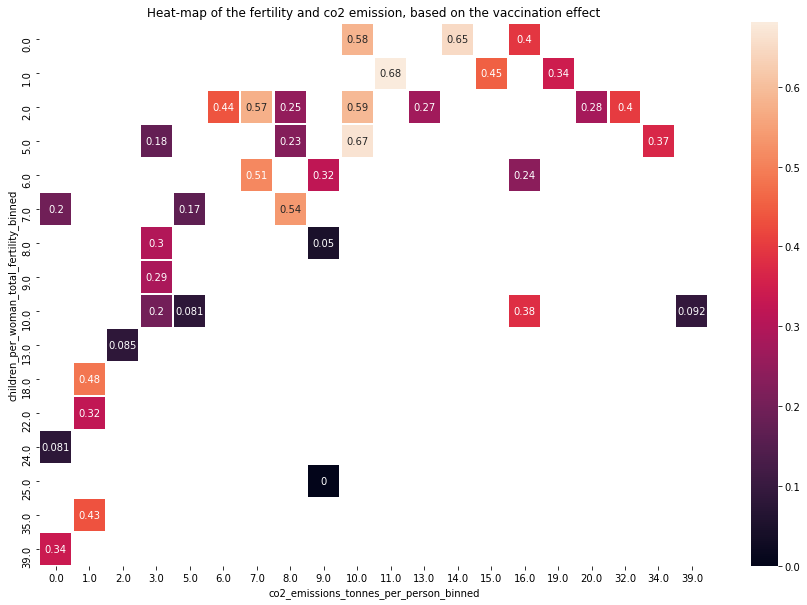

In [20]:
import seaborn as sns

#to convert the data to wide-format wrt vccin_effect_dag, children_per_woman_total_fertility_binned, and co2 emission
vcc_co2_fertility = heatmap_df.pivot_table(index = "children_per_woman_total_fertility_binned", 
                               columns = "co2_emissions_tonnes_per_person_binned",
                               values = "vccin_effect_dag",
                               observed = True,
                               dropna = False)

fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Heat-map of the fertility and co2 emission, based on the vaccination effect")

#show the heatmap of vaccine effect and co2 emission
sns.heatmap(vcc_co2_fertility, annot=True, linewidths=1.5, ax=ax);

#Saving the figure
plt.savefig('Exported_viz/heatmap-co2-fertility-vaccine.png')



**Explanation:**

1) The highest vaccination confidence have 11th bin of Co2_emission and first bin of fertility.

2) Empty cells appear, when there are no combination of bins for fertility and co2 emissions.

3) In general, high vaccine effects lay in the middle from the co2 emission; Mostly, low fertility values correlate with relatively high vaccine effects, except the fact that there are some singled binned values such as co2 emisssion 13,32,34 and 39. Empty cells show that there were no values between such bins. Also, co2 emissions and fertility are proportional inverse. 


## Question 3 - Frequent Item Sets and Association Rules (15 points)

(a) Carry out some preprocessing steps before starting the analysis:
 - Select 90% of the <b>store_data</b> dataset by random sampling. Use the matriculation number of one of the group members as seed.
 - After completing this preprocessing step, export your final dataset as <b>store_data_2.csv</b> dataset and use it for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [21]:
# Import FP-growth and Apriori modules, TransactionEncoder module and association module from mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule
from mlxtend.frequent_patterns import fpgrowth
from matplotlib import pyplot as plt

In [22]:
#data preprocesing
store_data_set = []

#reading store_data.csv into an array
with open('Datasets\store_data.csv') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        store_data_set.append(row)

#preprocesing dataset so it fits algorithms input
te = TransactionEncoder()
te_ary = te.fit(store_data_set).transform(store_data_set)
store_data_frame = pd.DataFrame(te_ary, columns = te.columns_)
store_data_frame.tail(5)

#random sampling of the dataset
store_data_frame = store_data_frame.sample(frac=0.9, random_state=414759)

store_data_frame

#saving the dataset
store_data_frame.to_csv('Exported_csv/store_data_2.csv')

(b) Find the most frequent itemsets with the support of more than 0.04 using the Apriori algorithm.

In [23]:
#applying apriori algorithm from mlxtend library
frequent_itemsets_b = apriori(store_data_frame, min_support = 0.04, use_colnames = True)
#displaying results
frequent_itemsets_b

support                    itemsets
0   0.085765                   (burgers)
1   0.080581                      (cake)
2   0.045623                 (champagne)
3   0.059547                   (chicken)
4   0.160273                 (chocolate)
5   0.078803                   (cookies)
6   0.051696               (cooking oil)
7   0.179825                      (eggs)
8   0.077618                  (escalope)
9   0.170345              (french fries)
10  0.043993               (fresh bread)
11  0.062509           (frozen smoothie)
12  0.095393         (frozen vegetables)
13  0.053474             (grated cheese)
14  0.131092                 (green tea)
15  0.097615               (ground beef)
16  0.050807             (herb & pepper)
17  0.047697                     (honey)
18  0.075692            (low fat yogurt)
19  0.127685                      (milk)
20  0.234928             (mineral water)
21  0.065768                 (olive oil)
22  0.094653                  (pancakes)
23  0.043253                    (salmon)
24  0.072286                    (shrimp)
25  0.048882                      (soup)
26  0.170197                 (spaghetti)
27  0.067249                  (tomatoes)
28  0.062954                    (turkey)
29  0.057177          (whole wheat rice)
30  0.052140  (chocolate, mineral water)
31  0.050067       (eggs, mineral water)
32  0.046808       (milk, mineral water)
33  0.057029  (spaghetti, mineral water)

(c) Find the most frequent itemsets with more than 1 member and a support of more than 0.04 using the Apriori algorithm.

In [24]:
#applying apriori algorithm from mlxtend library
frequent_itemsets_c = apriori(store_data_frame, min_support = 0.04, use_colnames = True)
#creating column with the number of items in the frequent itemset
frequent_itemsets_c['length'] = frequent_itemsets_c['itemsets'].apply(lambda x: len(x))
#filtering results
frequent_itemsets_c = frequent_itemsets_c[frequent_itemsets_c['length'] > 1]
#displaying results
frequent_itemsets_c

support                    itemsets  length
30  0.052140  (chocolate, mineral water)       2
31  0.050067       (eggs, mineral water)       2
32  0.046808       (milk, mineral water)       2
33  0.057029  (spaghetti, mineral water)       2

(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence, and lift of the filtered rules in one table. How do you interpret the quality of the discovered rules?

In [25]:
#applying apriori algorithm from mlxtend library
frequent_itemsets_d = apriori(store_data_frame, min_support = 0.04, use_colnames = True)
#calculating statistics of the association rules
rules_association_d = arule(frequent_itemsets_d, metric = 'confidence', min_threshold = 0.3)
#filtering over lift
rules_association_d.loc[rules_association_d['lift'] > 1.2]

antecedents      consequents  antecedent support  consequent support  \
0  (chocolate)  (mineral water)            0.160273            0.234928   
1       (milk)  (mineral water)            0.127685            0.234928   
2  (spaghetti)  (mineral water)            0.170197            0.234928   

    support  confidence      lift  leverage  conviction  
0  0.052140    0.325323  1.384779  0.014488    1.133983  
1  0.046808    0.366589  1.560432  0.016811    1.207861  
2  0.057029    0.335074  1.426283  0.017045    1.150612

**Explanation:**

In all cases, the support of disovered rules is relatively low, around 5% in all cases. Confidence level is between around 0,32 and 0.37 which means that the rules happened to be true in only around 1 out of 3 cases. All of the rules have lift above 1, which means that antecedents and consequents depend on each other. However since support and confidence are low, these rules would not be usefull, because they do not happen too often.

(e) Apply the FP-Growth algorithm for all the settings of b, c, and d.

In [26]:
# your code#Fp-Growth using setting b
frequent_itemsets_e_b = fpgrowth(store_data_frame, min_support=0.04, use_colnames=True)
print("FP-Growth algorithm with settings b")
print(frequent_itemsets_e_b)

#Fp-Growth using setting c
frequent_itemsets_e_c = fpgrowth(store_data_frame, min_support=0.04, use_colnames=True)
frequent_itemsets_e_c['length'] = frequent_itemsets_e_c['itemsets'].apply(lambda x: len(x))
#filtering results
frequent_itemsets_e_c = frequent_itemsets_e_c[frequent_itemsets_e_c['length'] > 1]
#displaying results
print("\nFP-Growth algorithm with settings c")
print(frequent_itemsets_e_c)

#Fp-Growth using setting d

#applying apriori algorithm from mlxtend library
frequent_itemsets_e_d = fpgrowth(store_data_frame, min_support = 0.04, use_colnames = True)
#calculating statistics of the association rules
rules_association_e_d = arule(frequent_itemsets_e_d, metric = 'confidence', min_threshold = 0.3)
#filtering over lift
rules_association_e_d.loc[rules_association_e_d['lift'] > 1.2]
#displaying results
print("\nFP-Growth algorithm with settings d")
print(rules_association_e_d)

FP-Growth algorithm with settings b
     support                    itemsets
0   0.078803                   (cookies)
1   0.062509           (frozen smoothie)
2   0.051696               (cooking oil)
3   0.085765                   (burgers)
4   0.065768                 (olive oil)
5   0.048882                      (soup)
6   0.170345              (french fries)
7   0.160273                 (chocolate)
8   0.127685                      (milk)
9   0.095393         (frozen vegetables)
10  0.075692            (low fat yogurt)
11  0.097615               (ground beef)
12  0.077618                  (escalope)
13  0.072286                    (shrimp)
14  0.059547                   (chicken)
15  0.053474             (grated cheese)
16  0.170197                 (spaghetti)
17  0.131092                 (green tea)
18  0.045623                 (champagne)
19  0.043253                    (salmon)
20  0.234928             (mineral water)
21  0.094653                  (pancakes)
22  0.080581         

## Question 4 - Text Mining (15 points): 

In this question, we use <b>sms_data.csv</b>. 

a) Load the dataset and create the <b>sampled_data</b> dataset which includes 90% of the data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. Split the sampled data into training (80%) and test (20%) data preserving the distribution based on "Label".

<font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [27]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('Datasets/sms_data.csv', sep=';', encoding='unicode_escape' )
sampled_data = df.sample(frac=0.90)
print(sampled_data.shape)
X = sampled_data['Text'].values
y = sampled_data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=414759,stratify=y)


(5015, 2)


### Classification

In the following tasks, train each of the specified models with the training data and give for each the accuracy on the training data.

(b) Model based on the binary document-term matrix

Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal) and obtain a binary document-term matrix. Train a logistic classifier with the 'Label' as target feature.

In [28]:
#Stemming function, that stemms each word in a list of words
def stemming(list_input, stemmer):
    stemmed_input_list=[]
    for item in list_input:
        stemmed_input_list.append(stemmer.stem(item))
    return stemmed_input_list

#Function removing stop_words from the list of words
def stop_word_removal(list_input):
    stop_words=set(stopwords.words("english"))
    filtered_words = []
    for item in list_input:
        if str(item) not in stop_words:
            filtered_words.append(item)
    return filtered_words

#Processing each row of the dataframe
def preprocessing_data(data_frame):
    #Calling a stemmer
    stemmer = LancasterStemmer()
    
    #Iterating over the input data frame
    for index, row in data_frame.iterrows():
        #lowering letters
        data_frame["Text"][index]=data_frame["Text"][index].lower()
        #removing punctation
        data_frame["Text"][index]=re.sub(r'[^\w\s]', '', data_frame["Text"][index])
        #tokenizing
        data_frame["Text"][index]=nltk.word_tokenize(data_frame["Text"][index])
        #stemming
        data_frame["Text"][index]=stemming(data_frame["Text"][index], stemmer)
        #removing stop words
        data_frame["Text"][index]=stop_word_removal(data_frame["Text"][index])        
    
    return data_frame
        
#Creating data frame
X_train = pd.DataFrame(X_train, columns=["Text"])
        
#Calling a function        
X_train = preprocessing_data(X_train)

#printing results
print(X_train[:25])

                                                 Text
0       [suck, il, go, ov, u, hair, youl, fre, right]
1                                [yeah, got, lin, us]
2   [real, ar, busy, guy, im, try, hav, get, som, ...
3                      [go, fool, dont, che, oth, ok]
4                                [ok, leav, nee, ask]
5   [ther, r, many, modelsony, ericson, also, der,...
6                                     [stitch, trous]
7   [449050000301, hav, 2000, pric, claim, cal, 09...
8       [hello, good, week, fant, drink, someth, lat]
9                         [prep, pound, every, night]
10  [123, congrat, thi, week, competit, draw, u, h...
11  [though, shd, go, n, hav, som, fun, bar, town,...
12             [busy, juz, dun, wan, 2, go, ear, hee]
13                   [ok, u, tak, shop, u, get, paid]
14                                [tel, someth, okay]
15  [themobhit, link, get, prem, pink, panth, gam,...
16  [im, hom, doc, gav, pain, med, say, everyth, fin]
17  [freemsg, hey, ther, dar

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

corpus_data = []

#Preprocessing the data into correct format
for index, row in X_train.iterrows():
    row_data = ""
    for word in X_train["Text"][index]:
        row_data = row_data + " " + word  
    corpus_data.append(row_data)

# Creating binary document-term matrix
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus_data)

X

<4012x6201 sparse matrix of type '<class 'numpy.int64'>'
	with 36121 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.linear_model import LogisticRegression

#training logistic classifier
logreg = LogisticRegression(solver='liblinear', random_state=414759)
logreg.fit(X, y_train)

LogisticRegression(random_state=414759, solver='liblinear')

(c) Model based on doc2vec

- Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal). 
- Obtain a doc2vec embedding in order to reduce the dimension of the document vector. Explain which vector size you use and why.
- Use the doc2vec model you just trained to convert the training set to a set of document vectors.
- Train a logistic classifier with 'Label' as target feature.

In [31]:
#In this task we will use the X_train data preprocessed in the previous step
X_train = X_train.to_numpy()

train_tagged = []

#Creating tagged document
for row_x, row_y in zip(X_train, y_train):
    train_tagged.append(TaggedDocument(words=row_x[0], tags=row_y))


In [32]:
from gensim.models import Doc2Vec

cores = multiprocessing.cpu_count()
doc2vec_model = Doc2Vec(dm=0, vector_size=60, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(train_tagged)])

# Training the doc2vec model
from sklearn import utils

for epoch in range(30):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha
    
#  feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets

100%|█████████████████████████████████████████████████████████████████████████| 4012/4012 [00:00<00:00, 4012290.81it/s]


In [33]:
#Training linear regression classifier on doc2vec
X_train_d2v, y_train_d2v = vec_for_learning(doc2vec_model, train_tagged)
logreg2 = LogisticRegression(n_jobs=1, C=1e5, random_state=414759)
logreg2.fit(X_train_d2v, y_train_d2v)


LogisticRegression(C=100000.0, n_jobs=1, random_state=414759)

**Explanation:**<br>
We used 60 as vector size, because when using doc2vec we need to make sure that we use a vector size that is much much lower than our vocabulary. If we increase the size of vector and use a higher dimension vectors than our vocabulary size, we will end up having over fitting model, as well as  slower training and larger model, preventing the model from representing generalizable patterns in the data. In our model we found that vector size 60 leads to better and more accurate results.

### Evaluation
For the following tasks, use the test data.

(d) Predict the classification with the two models on the test data. Preprocess the data if necessary.

In [34]:
test_tagged = []

#Creating data frame
print(type(X_test))
X_test = pd.DataFrame(X_test, columns=["Text"])
print(type(X_test))
#Calling a function        
X_test = preprocessing_data(X_test)

#Creating copy of the data for the first classifier
X_test_doc_term = X_test.copy()

#Creating binary doc-term matrix for the test data
corpus_data_test = []

#Preprocessing the data into correct format
for index, row in X_test_doc_term.iterrows():
    row_data = ""
    for word in X_test_doc_term["Text"][index]:
        row_data = row_data + " " + word  
    corpus_data_test.append(row_data)

# Creating binary document-term matrix
X_test_matrix = vectorizer.transform(corpus_data_test)


# Preprocessing the test to fit into doc2vec data
#  feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets


X_test = X_test.to_numpy()

test_tagged = []

#Creating tagged document for the testing data
for row_x, row_y in zip(X_test, y_test):
    test_tagged.append(TaggedDocument(words=row_x[0], tags=row_y))
    

#Calling feature vector for the classifier
X_test_d2v, y_test_d2v = vec_for_learning(doc2vec_model, test_tagged)

print(test_tagged)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
[TaggedDocument(words=['izzit', 'stil', 'rain'], tags='ham'), TaggedDocument(words=['want', 'ther', 'kiss', 'feel', 'next'], tags='ham'), TaggedDocument(words=['pleas', 'tel', 'al', 'car', 'key', 'ar', 'yo', 'purs'], tags='ham'), TaggedDocument(words=['know', 'mood', 'today'], tags='ham'), TaggedDocument(words=['want', 'new', 'video', 'handset', '750', 'tim', 'network', 'min', 'unlimit', 'text', 'camcord', 'reply', 'cal', '08000930705', 'del', 'sat'], tags='spam'), TaggedDocument(words=['u', 'r', 'much', 'clos', 'heart', 'u', 'go', 'away', 'wil', 'shat', 'plz', 'stay'], tags='ham'), TaggedDocument(words=['ya', 'nowon', 'roast'], tags='ham'), TaggedDocument(words=['sorry', 'il', 'cal', 'lat'], tags='ham'), TaggedDocument(words=['boy', 'lov', 'u', 'grl', 'hogolo', 'boy', 'gold', 'chain', 'kodstin', 'grl', 'agall', 'boy', 'necklac', 'madstin', 'grl', 'agall', 'boy', 'hogl', '1', 'muta', 'eerull', 'kodthin', 'grl', 'lov', 'u', '

In [35]:
X_test_matrix

<1003x6201 sparse matrix of type '<class 'numpy.int64'>'
	with 7996 stored elements in Compressed Sparse Row format>

In [36]:
#Predicting values on test data using binary document-term matrix with linear regression classifier
ypred1 = logreg.predict(X_test_matrix)

#Predicting values on test data using doc2vec with linear regression classifier
ypred2 = logreg2.predict(X_test_d2v)

(e) Obtain the confusion matrices for the two models and the prediction on the test data.

In [37]:
from sklearn.metrics import confusion_matrix
from IPython.display import display, HTML

display(pd.crosstab(np.array(y_test), np.array(ypred1), rownames=['True'],
colnames=['Predicted'], margins=True))

display(pd.crosstab(np.array(y_test_d2v), np.array(ypred2), rownames=['True'],
colnames=['Predicted'], margins=True))

Predicted  ham  spam   All
True                      
ham        867     2   869
spam        25   109   134
All        892   111  1003

Predicted    h   s   All
True                    
h          850  19   869
s           77  57   134
All        927  76  1003

(f) Obtain accuracy and F1-score for the prediction of the two different models on the test data.

In [38]:
from sklearn.metrics import accuracy_score, f1_score

print('Test accuracy %s' % accuracy_score(y_test, ypred1))
print('Test F1 score: {}'.format(f1_score(y_test, ypred1, average='weighted')))

print('Test accuracy %s' % accuracy_score(y_test_d2v, ypred2))
print('Test F1 score: {}'.format(f1_score(y_test_d2v, ypred2, average='weighted')))

Test accuracy 0.9730807577268196
Test F1 score: 0.9719929943507447
Test accuracy 0.9042871385842473
Test F1 score: 0.8926151231320357


(g) Briefly comment on the quality of the two models. Interpret the results retrieved in the evaluation part.

**Explanation:**<br>
Both models have high accuracy, however model trained on the binary document-term matrix is much better with accuracy of over 98%, compared to the 90.5% of the doc2vec model. Document-term matrix model is predicting "ham" class really well, it did not make any mistake there. Doc2vec also did good job on this part, making only 18 mistakes. However the biggest difference between models is that document-term matrix model predicted "spam" much better then the second model, 116/134 compared to 57/134.  


### Language model

For the following tasks use the <b>sampled_data</b>.

(h) Create two lists, one for ham and one for spam, containing all messages.
For ham and spam separately, build a bigram language model using the initial dataset (before splitting to training and test data). Do not perform stemming nor stopword removal for this task, but apply other preprocessing steps, such as all to lowercase, no punctuation and tokenization. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [39]:
sampled_data.head()

Label                                               Text
2106   ham                            I fetch yun or u fetch?
5190  spam  Our records indicate u maybe entitled to 5000 ...
4886   ham                    Poor girl can't go one day lmao
2382   ham  Best line said in Love: . "I will wait till th...
3143   ham  Not planned yet :)going to join company on jan...

In [40]:
# creating list for ham containg all messgaes  
ham_L = sampled_data.loc[sampled_data["Label"] == "ham"]["Text"].tolist()
# creating list for spam containg all messgaes  
spam_L = sampled_data.loc[sampled_data["Label"] == "spam"]["Text"].tolist()


In [41]:
#creating empty list for preprocessing steps
hamL=[]
spamL=[]

In [42]:
#applying preprocessing
for text in ham_L:
    hamL.append(preprocess_string(text,[lambda x: x.lower(), strip_punctuation,strip_multiple_whitespaces]))
for text in spam_L:
    spamL.append(preprocess_string(text,[lambda x: x.lower(), strip_punctuation,strip_multiple_whitespaces]))


In [43]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
# ceating a function that uses Maximum likely hood and and both right and left padding for n gram model genration
def generate_model(text,n):
#    n=2
    lm=MLE(n)
    train, vocab = padded_everygram_pipeline(n, text)  
    lm.fit(train, vocab)
    return lm


In [44]:
#applying generating function to our list for bigram
hamgenerate = generate_model(hamL,2)
spamgenrate = generate_model(spamL,2)

(i) For each message groups, use the correspondent language model from (h) to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [45]:
# calling our text generation model for ham and text_seed='hello',
ham1=hamgenerate.generate(num_words=15, text_seed='hello', random_seed=None)
# calling our text generation model for ham and text_seed='yes'
ham2=hamgenerate.generate(num_words=15, text_seed='yes', random_seed=None)
# calling our text generation model for ham and text_seed='but
ham3=hamgenerate.generate(num_words=15, text_seed='but', random_seed=None)
print(ham1)
print(ham2)
print(ham3)

['clock', 'though', '</s>', 'itna', 'forward', 'it', 'seriously', 'coz', 'i', 'll', 'call', 'any', 'purchases', 'yet', 'so']
['up', 'and', 'v', 'nice', 'night', 'just', 'sent', 'jd', 'for', 'some', 'food', '</s>', 'but', 'i', 'thank']
['mind', 'goin', 'back', 'urself', 'cos', 'darren', 'jus', 'finish', 'at', 'yck', '</s>', 'you', 'guys', 'a', 'great']


In [46]:
# calling our text generation model for spam and text_seed='hello'
spam1=spamgenrate.generate(num_words=15, text_seed='hello', random_seed=None)
# calling our text generation model for spam and text_seed='yes'
spam2=spamgenrate.generate(num_words=15, text_seed='yes', random_seed=None)
# calling our text generation model for spam and text_seed='but'
spam3=spamgenrate.generate(num_words=15, text_seed='but', random_seed=None)
print(spam1)
print(spam2)
print(spam3)

['£250', 'weekly', 'comp', 'just', '60p', 'min', 'check', 'out', 'who', 'it', 'takes', 'so', 'special', 'for', 'nokias']
['asian', 'tsunami', 'disaster', 'support', 'your', 'mobile', 'upd8', 'on', '10', 'free', 'stream', '0871212025016', '</s>', '<s>', 'urgent']
['know', 'u', 'todays', 'voda', 'numbers', 'ending', 'xxxx', 'are', 'awarded', 'either', '£500', 'ur', 'mins', 'half', 'price']


(j) Build a trigram model with the same data as in the previous task. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [47]:
# ceating a function that uses Maximum likely hood and and both right and left padding for n gram model genration
def generate_model(text,n):
#    n=3
    lm=MLE(n)
    train, vocab = padded_everygram_pipeline(n, text)  
    lm.fit(train, vocab)
    return lm

In [48]:
#applying generating function to our list for trigram
tri_hamgenerate = generate_model(hamL,3)
tri_spamgenrate = generate_model(spamL,3)

(k) For each message group (ham and spam), use the correspondent language model from the previous qustion to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [49]:
# calling our trigram text generation model for ham and text_seed='hello'
ham1=tri_hamgenerate.generate(num_words=15, text_seed='hello', random_seed=None)
# calling our trigram text generation model for ham and text_seed='yes'
ham2=tri_hamgenerate.generate(num_words=15, text_seed='yes', random_seed=None)
# calling our trigram text generation model for ham and text_seed='but'
ham3=tri_hamgenerate.generate(num_words=15, text_seed='but', random_seed=None)
print(ham1)
print(ham2)
print(ham3)

['well', 'uv', 'causes', 'mutations', 'sunscreen', 'is', 'like', 'a', 'pig', 'in', 'clover', 'or', 'whatever', 'the', 'saying']
['cool', 'just', 'text', 'me', 'when', 'you', 're', 'restocked', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
['b', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']


In [50]:
# calling our trigram text generation model for spam and text_seed='hello'
spam1=tri_spamgenrate.generate(num_words=15, text_seed='hello', random_seed=None)
# calling our trigram text generation model for spam and text_seed='yes'
spam2=tri_spamgenrate.generate(num_words=15, text_seed='yes', random_seed=None)
# calling our trigram text generation model for spam and text_seed='but'
spam3=tri_spamgenrate.generate(num_words=15, text_seed='but', random_seed=None)
print(spam1)
print(spam2)
print(spam3)

['44345', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
['true', 'it', 's', 'incredible', 'txts', 'reply', 'g', 'now', 'to', 'claim', 'this', 'weeks', 'savamob', 'member', 'offers']
['cs', 'po', 'box', '3', 'wa14', '2px', '150ppm', '18', 'sender', 'hol', 'offer', '</s>', '</s>', '</s>', '</s>']


(l) Compare the quality of the generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

**Explanation:** <br> From our oberservations the text generated by bigram is more intelligible and is able to produce more text. On the other hand the model generated by trigram is less intelligible and the text is also low quality often random words or number. As per our oberservation bigram perfoms better comparing to trigram.

An n-gram is a sequence n-gram of n words: a 2-gram (which we’ll call bigram) is a two-word sequence of words and a 3-gram (a trigram) is a three-word sequence of words, one the main diffrence's is that bigram makes a prediction for a word based on the previous one. Trigram makes a prediction for the word based on the two words before it.

## Question 5 - Process Mining (15 points): 

### General investigation

a) Import the event log from the <b>Quarantine_Log</b> csv file. Set the case ID to 'patient', Timestamp to 'timestamp' and Activity as 'activity'. Also, set the lifecyle column to the right attribute. Furthermore, identify the case attributes and set them to case attributes. Find the correct setting, so that the resource is understood as resource (compare with the documentation). Give some basic information:

    - number of cases
    - number of variants
    - number of events
    - the trace and event attribute names
    - the number of resources
    - the earliest timestamp and the latest timestamp

In [51]:
import os
import pm4py
from pm4py.objects.log.importer.csv import factory as csv_importer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.pandas.end_activities import end_activities_filter
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.pandas import case_statistics
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.objects.log.util import interval_lifecycle
from pm4py.util import constants
from pm4py.objects.log.util import get_log_representation
from pm4py.statistics.traces.log import case_statistics


#import csv file to dataframe
log_pd = pd.read_csv('Datasets/Quarantine_log.csv', sep=',')

#convert timestamp columns so it can be sorted
log_pd = dataframe_utils.convert_timestamp_columns_in_df(log_pd)
#sort the events
log_pd = log_pd.sort_values('Timestamp')

#rename column name Patient to case:concept:name and this is the Case ID of this log
log_pd.rename(columns={'Patient': 'case:concept:name'}, inplace=True)

#rename column name Timestamp to time:timestamp
log_pd.rename(columns={'Timestamp': 'time:timestamp'}, inplace=True)

#rename column name Activity' to 'concept:name
log_pd.rename(columns={'Activity':  'concept:name'}, inplace=True)

#rename column name 'Lifecycle' to 'lifecycle:transition'
log_pd.rename(columns={'Lifecycle': 'lifecycle:transition'}, inplace=True)

#rename column name 'Resource' to 'org:resource'
log_pd.rename(columns={'Resource': 'org:resource'}, inplace=True)

#Identify Case ID to use the log_converter, and apply log_converter 
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:concept:name'}

#to convert Pandas Dataframe to log data 
event_log = log_converter.apply(log_pd, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

#The lead/cycle time can be calculated on top of interval logs. 
#If we have a lifecycle log, we need to convert that with:
#Each case contains multiple events that regard lead or cycle time, which makes the events appear duplicated in a variant

#the number of cases
print("Number of cases : ",len(event_log))

#count the number of each variant
variants_count = case_statistics.get_variant_statistics(event_log)

#sort the occurence of each variant descending 
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=False)

print("The number of variant", len(variants_count))

#for-loop function to count the number of events in each trace and *(multiply) the occurence
#variants : a list of variants
def count_events(variants):
    
    #get the length of the variant list
    var_len = len(variants)
    #initialize the number of events to zero
    num_events = 0
    
    #iterate all dict in the list
    for i in range(var_len):

        #add all the number of events in each variant * the occurence of the variant
        num_events += len(variants[i]["variant"].split(","))*variants[i]['case:concept:name']
        
    #return
    return num_events

#print("number of events : ", count_events(variants_count))

#event attribute names
attributes_list = pm4py.get_attributes(event_log)

print("The trace and event attribute names : ", attributes_list)

#list of resources
resources = attributes_filter.get_attribute_values(event_log, "org:resource")
print("The number of resources : ", len(set(list(resources))))

#list of timestamps; these are comparable, thus, extracted max(as the latest timestamp) 
#and min value(ass the earliest timestamp) from the whole list 
timestamps = attributes_filter.get_attribute_values(event_log, 'time:timestamp')


print("The earliest timestamp : {}\nthe latest timestamp   : {} ".format(min(list(timestamps.keys())), 
                                                                       max(list(timestamps.keys()))))


Number of cases :  1500
The number of variant 464
The trace and event attribute names :  ['ModelTime', 'time:timestamp', 'PatientName', 'concept:name', 'Insurance', 'Type', 'org:resource', 'Age']
The number of resources :  133
The earliest timestamp : 2020-06-01 06:00:00+00:00
the latest timestamp   : 2020-07-31 14:31:03+00:00 


### Sampling the event log
(b) Create a sample of the event log (<b>log_sampled</b>) containing 80% of the traces. Export the sampled event log.

<font color='red'>Important!</font> Make sure that you submit your extracted event log with your results in Moodle.

In [52]:
from pm4py.algo.filtering.log.variants import variants_filter

#event_log = log_converter.apply(log_pd, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

event_log_copy = log_converter.apply(log_pd, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

#before sampling is the number of the traces. = 1500
print('the length of the log Before sampling: ', len(event_log))

#sample the log by pm4py.objects.log.util.sampling.sample

#get the length of the dataframe * 0.8 and sampling with this number
log_sampled = pm4py.objects.log.util.sampling.sample(event_log, int(len(event_log)*0.8))

#a copy data from the above to use in d)
log_sampled_copy = pm4py.objects.log.util.sampling.sample(event_log, int(len(event_log_copy)*0.8))

#convert the log_sampled to dataframe
log_sampled_df = log_converter.apply(log_sampled, variant=log_converter.Variants.TO_DATA_FRAME)

#export to csv file log_sampled.csv
log_sampled_df.to_csv("Exported_csv/log_sampled.csv")

#after sampling is the number of the traces = 1200
print('the length of the log after sampling: ',len(log_sampled))


the length of the log Before sampling:  1500
the length of the log after sampling:  1200


### Trace frequency
(c) Use the sampled event log and print the least frequent and the most frequent variant and the corresponding counts. Is there already some indication about the model structure (e.g. loops, parallel, etc.)?

In [53]:
log_sampled = interval_lifecycle.to_interval(log_sampled)

#to insert the feature of lead/cycle time 
#reference in the section 'Calculating useful features' https://pm4py.fit.fraunhofer.de/documentation#importing 
log_sampled = interval_lifecycle.assign_lead_cycle_time(log_sampled, parameters={
    constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "start_timestamp",
    constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

#count the occurence of each variant
variants_count_sampled = case_statistics.get_variant_statistics(log_sampled)
#sort the variants by its occurence
variants_count_sampled = sorted(variants_count_sampled, key=lambda x: x['count'], reverse=True)

#the most frequent variant
print("\nMost frequent variant: ", variants_count_sampled[0])

#one of the least frequent variant(there are several varitants with frequency 1)
print("\nLeast frequent variant: ", variants_count_sampled[len(variants_count_sampled)-1])



Most frequent variant:  {'variant': 'Register,Initial Exam,Initial Exam Decision,Discharge Init Exam', 'count': 603}

Least frequent variant:  {'variant': 'Register,Initial Exam,Initial Exam Decision,Inform about Isolation,Control Call,Control Call,Control Call,Control Call,Control Call,Control Call,Control Call,Control Call,Control Call,Control Call,Control Call,Test III,Test III Decision,Discharge Test', 'count': 1}


**Explanation:**<br>  Based on the most and least frequent variants, the both starts with three sequential events "Register", "Initial Exam", and "Initial Exam Decision". After that the both split into Discharge Init Exam, or Call Control and Test III Decision. Another noticeable characteristic is double happening of Control Call. Otherwise, The both variants works sequentially.

### Filter event logs
(d) Create three different event logs:

1. One event log containing only the 10% of the most frequent traces (**filtered_log_variants**).
2. One event log containing only patients with private insurance (**filtered_log_insurance**).
3. One event log containing only patients having the event attribute type as 'cloud' (**filtered_log_cloud**).

In [54]:
#from the sampled log

#event log that contains the 10% of the most frequent traces by filter_log_variants_percentage methode
filtered_log_variants = variants_filter.filter_log_variants_percentage(log_sampled_copy, percentage=0.1)
#through this method, the lead/cycle time can be converted, such that duplicate of events can be removed 
filtered_log_variants = interval_lifecycle.to_interval(filtered_log_variants)

#to insert the feature of lead/cycle time 
#reference in the section 'Calculating useful features' https://pm4py.fit.fraunhofer.de/documentation#importing 
filtered_log_variants = interval_lifecycle.assign_lead_cycle_time(filtered_log_variants, parameters={
    constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "start_timestamp",
    constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})


#event log, of which insurance = 'PRIV'(Private insurance) by attributes_filter
filtered_log_insurance = attributes_filter.apply(log_sampled_copy, ['PRIV'],
                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: 'Insurance', attributes_filter.Parameters.POSITIVE: True})

#through this method, the lead/cycle time can be converted, such that duplicate of events can be removed 
filtered_log_insurance = interval_lifecycle.to_interval(filtered_log_insurance)

#to insert the feature of lead/cycle time 
#reference in the section 'Calculating useful features' https://pm4py.fit.fraunhofer.de/documentation#importing 
filtered_log_insurance = interval_lifecycle.assign_lead_cycle_time(filtered_log_insurance, parameters={
    constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "start_timestamp",
    constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})



#event log, of which attribute type = 'cloud'(Private insurance) by attributes_filter
filtered_log_cloud = attributes_filter.apply(log_sampled_copy, ['cloud'],
                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: 'Type', attributes_filter.Parameters.POSITIVE: True})
#through this method, the lead/cycle time can be converted, such that duplicate of events can be removed 
filtered_log_cloud = interval_lifecycle.to_interval(filtered_log_cloud)

#to insert the feature of lead/cycle time 
#reference in the section 'Calculating useful features' https://pm4py.fit.fraunhofer.de/documentation#importing 
filtered_log_cloud = interval_lifecycle.assign_lead_cycle_time(filtered_log_cloud, parameters={
    constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "start_timestamp",
    constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

filtered_log_cloud

#through this method, the lead/cycle time can be converted, such that duplicate of events can be removed 
filtered_log_cloud = interval_lifecycle.to_interval(filtered_log_cloud)

filtered_log_cloud = interval_lifecycle.assign_lead_cycle_time(filtered_log_cloud, parameters={
    constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "start_timestamp",
    constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})



### Discovery and conformance checking

(e) Use the Inductive Miner to discover a process model (Process tree or Petri net) for each event log created in (d). For one of the models - you may choose - explain shortly the behaviour of the model. (e.g. loops, sequences)

In [55]:
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.petrinet import factory as pn_vis_factory
from pm4py.visualization.process_tree import factory as pt_vis_factory


#process tree for the log_variants
tree_variants = inductive_miner.apply_tree(filtered_log_variants)

#create petri-net for the filtered_log_variants
net, initial_marking, final_marking = inductive_miner.apply(filtered_log_variants)
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)



#process tree for the log_insurance
tree_insurance = inductive_miner.apply_tree(filtered_log_insurance)

#process tree for the log_cloud
tree_cloud = inductive_miner.apply_tree(filtered_log_cloud)



"""
* : redo
-> : sequential
X : exclusive choice
tau : silent activity

*(tau, a) -> a do not need to be executed
*(a ,tau) -> a should be executed at least one time
"""
#process tree of log that contains 10% of the most frequent variants 
print(tree_variants)
#petri net of log that contains 10% of the most frequent variants 
pn_vis_factory.view(gviz_pn)

#Save the plot
pn_vis_factory.save(gviz_pn, "Exported_viz/frequent_variants.png")

->( 'Register', 'Initial Exam', 'Initial Exam Decision', X( 'Discharge Init Exam', 'Inform about Isolation' ), X( *( τ, 'Control Call' ), τ ), X( 'Test III', τ ), X( 'Test III Decision', τ ), X( 'Discharge Test', τ ) )


C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:7: DeprecatedWarning: apply_tree is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (discovery/inductive/factory)
  import sys
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:10: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (discovery/inductive/factory)
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:11: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:16: DeprecatedWarning: apply_tree is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint inst

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:38: DeprecatedWarning: save is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.


**Explanation:** <br>The process tree of filtered_log_variants starts with 'Register' followed by 'Initial Exam', 'Initial Exam Decision' sequentially. After that, an exclusive-choice between 'Discharge Init Exam' and 'Inform about Isolation' continues the process tree. Then, the process enter an exclusive-choie between the loop of 'Control Call' or silent activity. The next step is again the exclusive-choice between 'Test III' and silent activity, and again the exclusive-choice between 'Test III Decision' and a silent activity. Lastly, the process tree shows the last exclusive-choice between 'Discharge Test' and a silent activity, and terminates.

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:2: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (discovery/inductive/factory)
  
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:8: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  


->( 'Register', 'Initial Exam', 'Initial Exam Decision', X( 'Discharge Init Exam', 'Inform about Isolation' ), X( *( τ, 'Control Call' ), τ ), X( 'Test III', τ ), X( 'Test III Decision', τ ), X( 'Discharge Test', 'Prescripe Special Medication', τ ), X( *( ->( X( ->( X( *( ->( X( ->( X( *( X( 'Referral', 'Inform Authority Fill Form', 'Control Call Wait Facility' ), τ ), τ ), 'Register Facility' ), 'Treatment A2', 'Treatment A3', τ ), X( ->( X( 'Inform Authority Send Form', τ ), 'Decide Treatment' ), 'Check Treatment A2', 'Check Treatment A3', τ ) ), τ ), τ ), 'Treatment A1' ), τ ), X( +( 'Check Treatment B', *( τ, 'Treatment B' ) ), 'Check Treatment A1', τ ) ), τ ), τ ), X( 'Discharge', τ ) )


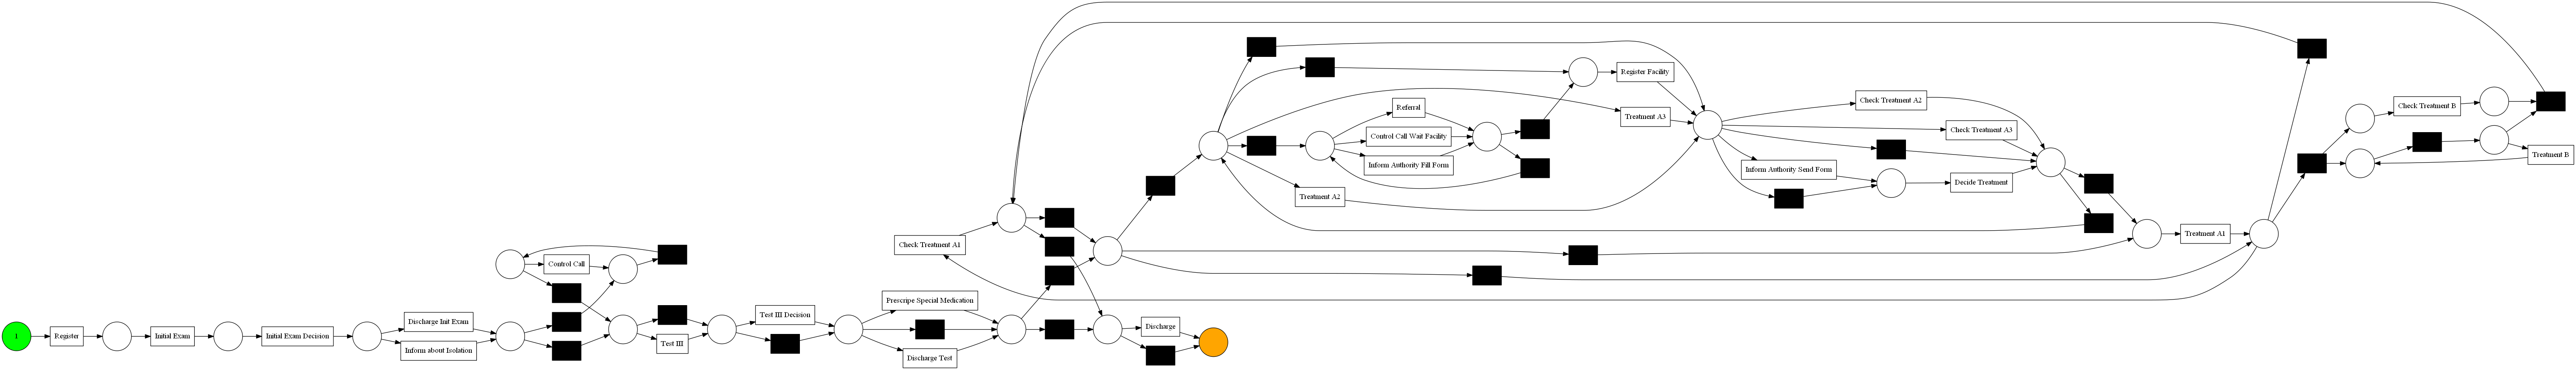

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:10: DeprecatedWarning: save is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  # Remove the CWD from sys.path while we load stuff.


In [56]:
#create petri net of log from private insurance 
net, initial_marking, final_marking = inductive_miner.apply(filtered_log_insurance)
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)

#process tree of log from private insurance
print(tree_insurance)
#petri net of log from private insurance
pn_vis_factory.view(gviz_pn)
#Save the plot
pn_vis_factory.save(gviz_pn, "Exported_viz/insurance_variants.png")

In [57]:
#create petri net of log from event attribute type : cloud
net, initial_marking, final_marking = inductive_miner.apply(filtered_log_cloud)
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)

#process tree of log from event attribute type : cloud
print(tree_cloud)
#petri net of log from event attribute type : cloud
pn_vis_factory.view(gviz_pn)
#Save the plot
pn_vis_factory.save(gviz_pn, "Exported_viz/cloud_variants.png")

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:2: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (discovery/inductive/factory)
  
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:8: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  


->( 'Register', 'Initial Exam', 'Initial Exam Decision', 'Inform about Isolation', X( *( τ, 'Control Call' ), τ ), 'Test III', 'Test III Decision', X( 'Prescripe Special Medication', τ ), *( ->( X( ->( X( *( ->( X( ->( X( *( τ, 'Control Call Wait Facility' ), τ ), X( 'Referral', τ ), X( 'Register Facility', τ ), 'Inform Authority Fill Form' ), 'Treatment A2', 'Treatment A3', τ ), X( ->( X( 'Decide Treatment', τ ), 'Inform Authority Send Form' ), 'Check Treatment A2', 'Check Treatment A3', τ ) ), τ ), τ ), 'Treatment A1' ), τ ), X( *( ->( X( *( τ, 'Treatment B' ), τ ), X( 'Check Treatment B', τ ) ), τ ), 'Check Treatment A1', τ ) ), τ ), 'Discharge' )


C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:10: DeprecatedWarning: save is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  # Remove the CWD from sys.path while we load stuff.


(f) Briefly summarize the differences and similarities of the models. Why do they differ/are similar?

**Explanation:**<br>
Similarities:<br>
 1) The both models starts with the sequence of three activities ('Register', 'Initial Exam', 'Initial Exam Decision'). <br>
 2) Activities continue sequentially(from the 'Inform about Isolation' to the 'Prescripe Special Medication').<br>
 3) After the activity 'Prescribe Special Medication', starts the long journey to the 'Discharge'.<br>
 4) The both of the processes end up in 'Discharge'.<br>
 5) After each Treatment A1, Treatment A2, Treatment A3, the process do the Check Treatment A1, Check Treatment A2, and Check Treatment A3.<br>
 6) Treatment A2 and Treatment A3 are in exclusive-choice, and Check Treatment A2 and Check Treatment A3 are also in exclusive-choice.<br><br>
Differences:<br>
1) After the first sequence three activities, the model from the filtered_log_insurance enters the exclusive-choice between the 'Discharge Init Exam' and 'Inform about Isolation', while the model from the filtered_log_cloud dive into the loop of 'Control Call' after the 'Inform about Isolation'.<br>
2) In the filtered_log_insurance, 'TestIII', 'TestIII Decision', and 'Discharge' are in exclusive-choice.<br>
3) In the filtered_log_insurance, 'Discharge Test' and 'Prescribe Special Medication' are in an exclusive-choice.<br>
4) In the filtered_log_insurance, 'Referral', 'Control Call Wailt Facility' and 'Inform Authority Fill Form' are in the exclusive-choice, while these from a sequence in the filtered_log_cloud.<br>
5) In the filtered_log_insurance, 'Register Facility' follows the 'Inform Authority Fill Form', while this is reversed in the filterd_log_cloud.<br>
6) 'Infrom Authority Send From' proceed the Decide Treatment in the filtered_log_insurance; This is reversed in the filtered_log_cloud.<br>
7) 'Treatment B' and 'Check Treatment B' are sequentiall in the filtered_log_cloud, while this is reversed in the filtered_log_insurance.<br>
8) filtered_log_cloud has the sequence of three loops of 'Control Call Wailt Facility', 'Referral' and 'Register Facility'.<br>
9) In the filtered_log_insurance, 'Control Call Wait Facility', 'Referral', and 'Inform Authority Fill Form' are in the exclusive-choice, while 'Control Call Wait Facility' is in the loop, such that this activity is executed zero time or at least one time; 'Referral', and the 'Register Facility' are in an exclusive-choice with a silent activity.<br>
10) The activity 'Discharge Init Exam', 'Discharge Test' only appear in the filtered_log_cloud, not in the filtered_log_insurance.<br>

The two logs have similar activites in some part, such as performed activities, some similar order of activities(at the beginning from the 'Regisnter' to 'Prescribe Special Medication', some activites are performed in a loop like loop('activity', tau), after each 'Treatment (A1, A2, A3)' follows 'Treatment (A1, A2, A3) check' etc, these may indicate some activites should be performed in a series to handle a patient. It can indicate that the most 10% frequent patient cases did not require more serious processes, such as 'Treatment' or 'Register Facility' etc. On the other hands, the other two variants contain more patient's case that required such complicated activities.
Meanwhile, the two filtered logs can differ because the both show process model based on event log of different types of patients.



(g) Perform the token-based replay for conformance checking using your discovered model for **filtered_log_variants** and the original event log. Does your process model fit the log? Explain the result in one sentence. Calculate the trace and log fitness.

In [58]:
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

#this asks surely perform the conformance checking of the original event log on the model for the filtered_log variants?

net, initial_marking, final_marking = inductive_miner.apply(filtered_log_variants)

# this method performs the token-based-replay on the modelled petri-net to compute the trace-fitness of each trace for the given log
token_replay_result = token_based_replay_factory.apply(event_log, net, initial_marking, final_marking)

# performs 
token_replay_result_filtered = token_based_replay_factory.apply(filtered_log_variants, net, initial_marking, final_marking)

# Computing log fitness
# percentage of fitting traces and the average fitness of the log
fitness_tokenbasedreplay = replay_fitness_factory.apply(event_log, net, initial_marking, final_marking)
print("")
print(fitness_tokenbasedreplay)


C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:6: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (discovery/inductive/factory)
  
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:9: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (tokenreplay/factory)
  if __name__ == '__main__':
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:12: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (tokenreplay/factory)
  if sys.path[0] == '':
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:16: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use evaluator entrypoint instead
  app.launch_new_instance()



{'percFitTraces': 0.0, 'averageFitness': 0.5128062833351043}


**Explanation:**
The model has a fitness of around 51.3%, because of the low number of traces used to create the model. However if we consider that we achieved this fitness only, with 10% most frequent variants, it still seems to be a good score. That also indicates that in the process most variants are following the main process route, with a lot of non-frequent singular variants that are outliers from the main process.

### Frequency and performance

(h) Visualize the model for the **filtered_log_variants** event log enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (discovery/dfg/factory)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:7: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  import sys
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:8: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  


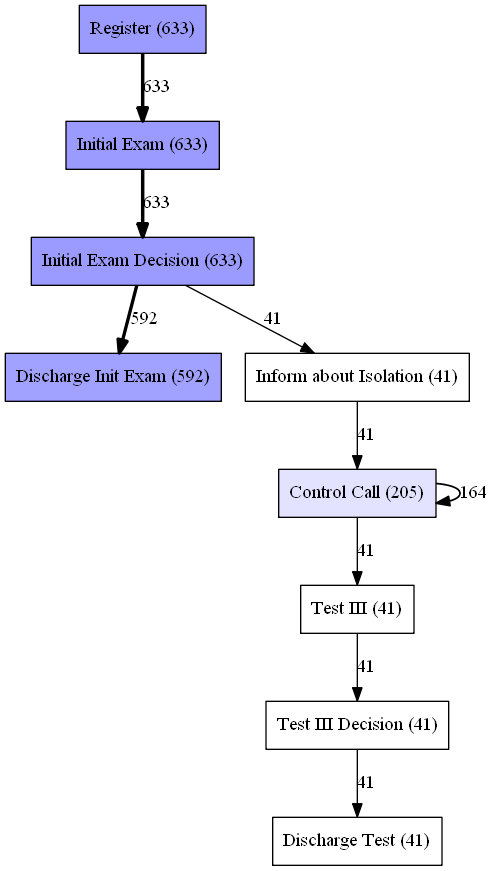

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:10: DeprecatedWarning: save is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  # Remove the CWD from sys.path while we load stuff.


In [59]:
from pm4py.algo.discovery.dfg import factory as dfg_factory

dfg = dfg_factory.apply(filtered_log_variants)

from pm4py.visualization.dfg import factory as dfg_vis_factory

gviz_dfg = dfg_vis_factory.apply(dfg, log=filtered_log_variants, variant='frequency')
dfg_vis_factory.view(gviz_dfg)
#Save the plot
dfg_vis_factory.save(gviz_dfg, "Exported_viz/filtered_log_variants_frequency.png")

In [60]:
gviz_dfg = dfg_vis_factory.apply(dfg, log=filtered_log_variants, variant='performance')
dfg_vis_factory.view(gviz_dfg)
#Save the plot
dfg_vis_factory.save(gviz_dfg, "Exported_viz/filtered_log_variants_performance.png")

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:1: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  """Entry point for launching an IPython kernel.
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:2: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  


C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:4: DeprecatedWarning: save is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  after removing the cwd from sys.path.


(i) What are frequent activities? Why may they be frequent (think about the real life process described by the log)? What are possibly problematic activities according to the performance?

**Explanation:** ''Register', ''Initial Exam', 'Initial Exam Decision', and 'Discharge Init Exam' are the most frequent.
If a person is presumably infected with the COVID, she/he visit a hospital, register her/himself('Register'), is tested ('Initial Exam') until the diagnosis is made('Initial Exam Decision'). Then the medical personals decide whether this patient should be kept in isolation to treat ('Inform about Isolation'), or let her/him go home('Discharge Init Exam').

The 4 initial activities('Register', 'Discharge Init Exam', 'Initial Exam Decision', and 'Initial Exam') seem problematic because they occur most frequently, and take longer time than the others.

## Question 6 - Big Data (15 points): 

### Preparation: generating a simple log

In this question, we use the event log from the log csv file with the following modifications:
1. We flatten the lifecycles (i.e., start and complete) into a single event. Each event contains the start timestamp and complete timestamp.
2. A new column, called ServiceTime column, is included which represents the duration of the corresponding activity in the event.

We name the event log as **simple_log** in the remainder. Please follow the explanations below to prepare the **simple_log**. The preparation steps will not be graded.

In [61]:
# We use following utility functions for the modifications (these are given):
def _distinguish_duplicate_activities(log):
    """Add flags to the duplicate activities in a trace in order to distinguish them

    Keyword arguments:
    log -- even log
    """
    trace = list()
    activity_list = list()
    count=0
    prev_caseid=""
    for row in log.itertuples():
        activity=row.Activity
        caseid=row.Patient
        if(caseid!=prev_caseid):
            count=0
            prev_caseid=caseid
            trace=[]

        if activity in trace:
            count+=1
            activity = activity + "-{}".format(count)
            
        trace.append(activity)
        activity_list.append(activity)
    log["Activity"] = activity_list
    return log

def _merge_lifecylces(log):
    """Merge lifycycles (start,complete) into a single event. 

    Keyword arguments:
    log -- even log
    """
    start_log = log.loc[log["Lifecycle"]=="start"]
    start_log = _distinguish_duplicate_activities(start_log)
    
    complete_log = log.loc[log["Lifecycle"]=="complete"]
    complete_log = _distinguish_duplicate_activities(complete_log)

    complete_log["CompleteTime"] = complete_log["ModelTime"]
    simple_log = start_log.merge(complete_log, left_on=['Patient',"Activity"], right_on=['Patient',"Activity"],suffixes=("", "_y"))
    simple_log.drop(simple_log.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
    simple_log["ServiceTime"] = simple_log["CompleteTime"] - simple_log["ModelTime"]
    return simple_log

def produce_simple_log(filepath):
    """Produce simple log where the lifecycles are merged and service time information is added

    Keyword arguments:
    filepath -- path to event log
    """
    log = pd.read_csv(filepath, sep=',')
    log.sort_values(by=["Patient","ModelTime"],inplace=True)
    simple_log = _merge_lifecylces(log)
    return simple_log

**Preparation step 1**: Replace the filepath to your own filepath to produce the **simple_log**.  

In [62]:
import pandas as pd
#your filepath
filepath = "./Datasets/Quarantine_log.csv"
simple_log = produce_simple_log(filepath)

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Preparation: expanding the event log

In this question, we generate 100 event logs based on the <b>simple_log</b>. Each log replicates the base log (i.e., the <b>simple_log</b>). For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [63]:
# We use following utility functions for the modifications (these are given):
import random
def _randomize_case_attribute(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    random.seed(matriculation_num)
    caseids = set(log["Patient"])
    for caseid in caseids:
        random_val = random.randint(-3,3)
        random.seed(random_val)
        log.loc[log["Patient"]==caseid,"Age"] = log.loc[log["Patient"]==caseid,"Age"]+random_val
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    import os
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    base_log = original_log.copy(deep=True)
    max_modeltime = max(base_log["ModelTime"])
    max_patientid = max(base_log["Patient"])
    for i in range(num_replication):
        generated_log = base_log
        generated_log["Patient"] += max_patientid
        generated_log["ModelTime"] += max_modeltime
        random.seed(None)
        randomized_log = _randomize_case_attribute(generated_log,random.randint(0,mat_num))
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))
        base_log = randomized_log

**Preparation step 2**: Generate 100 replicated logs in your local disk (./generated-logs/generated-log-0.tsv, ./generated-logs/generated-log-1.tsv, ..., ./generated-logs/generated-log-99.tsv). Do not forget to replace the SUM_MAT_NUM to yours.

In [64]:
#your group's sum
SUM_MAT_NUM = 414760+415639+414759
base_log = simple_log[["Patient", "ModelTime","Activity","Age","ServiceTime"]] # this will be removed
NUM_REPITITION=100
generate_log(base_log,NUM_REPITITION,SUM_MAT_NUM)

Successfully created the directory ./generated_logs 
Successfully created 0 th log at ./generated_logs 
Successfully created 1 th log at ./generated_logs 
Successfully created 2 th log at ./generated_logs 
Successfully created 3 th log at ./generated_logs 
Successfully created 4 th log at ./generated_logs 
Successfully created 5 th log at ./generated_logs 
Successfully created 6 th log at ./generated_logs 
Successfully created 7 th log at ./generated_logs 
Successfully created 8 th log at ./generated_logs 
Successfully created 9 th log at ./generated_logs 
Successfully created 10 th log at ./generated_logs 
Successfully created 11 th log at ./generated_logs 
Successfully created 12 th log at ./generated_logs 
Successfully created 13 th log at ./generated_logs 
Successfully created 14 th log at ./generated_logs 
Successfully created 15 th log at ./generated_logs 
Successfully created 16 th log at ./generated_logs 
Successfully created 17 th log at ./generated_logs 
Successfully created 

### Basic Hadoop

(a) Now, it's time to work with the Hadoop system. The goal of this task is to merge 100 event logs at your disk in the Hadoop system. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Alessandro Berti", "Bernardo Silva", "Chiao Li", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the files to the running Hadoop system (at /input/(identifier)-generated-logs/). 
    3) Merge the file and copy the result back to the Hadoop system (at /input/(identifier)-final-log.tsv).
    4) Using the Hadoop command, print out the merged file in the command line (the screenshot may contain 10 rows).

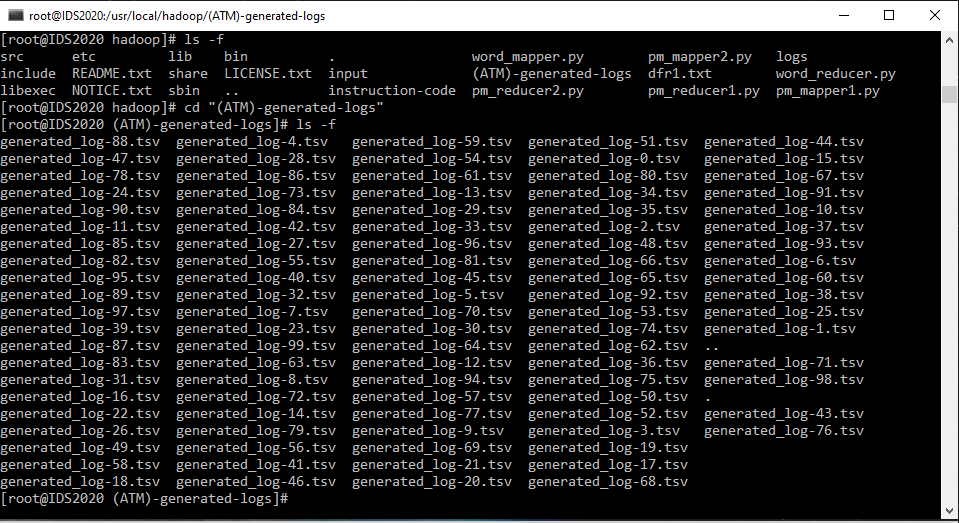

In [65]:
#Displaying saved image
from IPython.display import Image
Image(filename='Screenshots/6a1.png')

In [66]:
#Displaying saved image
Image(filename='Screenshots/6a2.png') 

In [67]:
#Displaying saved image
Image(filename='Screenshots/6a3.png')

In [68]:
#Displaying saved image
Image(filename='Screenshots/6a4.png')

### Process Discovery

(b) Discover a process model from the merged file using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Jupyter notebook code that prints the directly-follows relations and discover process models based on the directly-follows relations (you are free to use any discovery algorithms)

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

**Explanation:** <br>
1-2) To discover the process model we had to use two MapReduce steps, to aquire directly-follows relations. <br>*First Mapper*, contained in file pm_mapper1.py (attached to the solution) process each file of the input file and emits (key, value) pair, where key is case id, concatenated with timestamp, and value is an activity name. Between Map and Recude stages there is a shuffle stage, that sorts mapper results according to the keys. We do not need to programme it since this step is always the same and is written within Hadoop framework. To maintain the order of the activities within the same case id, first mapper returns case and timestep within the key.<br> *First Reducer*, based on the output from firt mapper will return another key-value pairs, where key is case id, and value is a list with ordered activities in a given case.<br>
*Second mapper*, will split the activity list into pairs, of directly follows activities, and return key-value pairs, where key are two activities that are after each other, and value is 1. <br>*Second reducer* will calculate the number of occurances of each directly follows relations, and return it as key-value pair, where key is relation, and value is number of its occurance.<br><br>
3)Hadoop commands for MapReduce calculation <br>
**Copying python files from local disk to docker**<br>
docker cp "D:\Dysk Google\aaData Science RWTH\Semester 2\Introduction to Data Science\Assignment 2\assignment-code/" 259af2b87511:/usr/local/hadoop/<br>

**First run mapreduce**<br>
hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.4.jar \\<br>
-file /usr/local/hadoop/assignment-code/pm_mapper1.py \\<br>
-mapper "python pm_mapper1.py" \\<br>
-file /usr/local/hadoop/assignment-code/pm_reducer1.py \\<br>
-reducer "python pm_reducer1.py" \\<br>
-input "/input/(ATM)-final-log.tsv" \\<br>
-output /output/Assignment2-6b<br><br>
**Second run mapreduce**<br>
hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.4.jar \\<br>
-file /usr/local/hadoop/assignment-code/pm_mapper2.py \\<br>
-mapper "python pm_mapper2.py" \\<br>
-file /usr/local/hadoop/assignment-code/pm_reducer2.py \\<br>
-reducer "python pm_reducer2.py" \\<br>
-input /output/Assignment2-6b/part-00000 \\<br>
-output /output/Assignment2-6b-final<br><br>
**Copying output file to the container**<br>
hadoop fs -copyToLocal /output/Assignment2-6b-final/part-00000 /usr/local/hadoop/assignment2-6b.txt <br><br>
**Copying output file to the local filesystem** <br>
docker cp 259af2b87511:/usr/local/hadoop/assignment2-6b.txt "D:\Dysk Google\aaData Science RWTH\Semester 2\Introduction to Data Science\Assignment 2\output"

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:23: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:24: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.


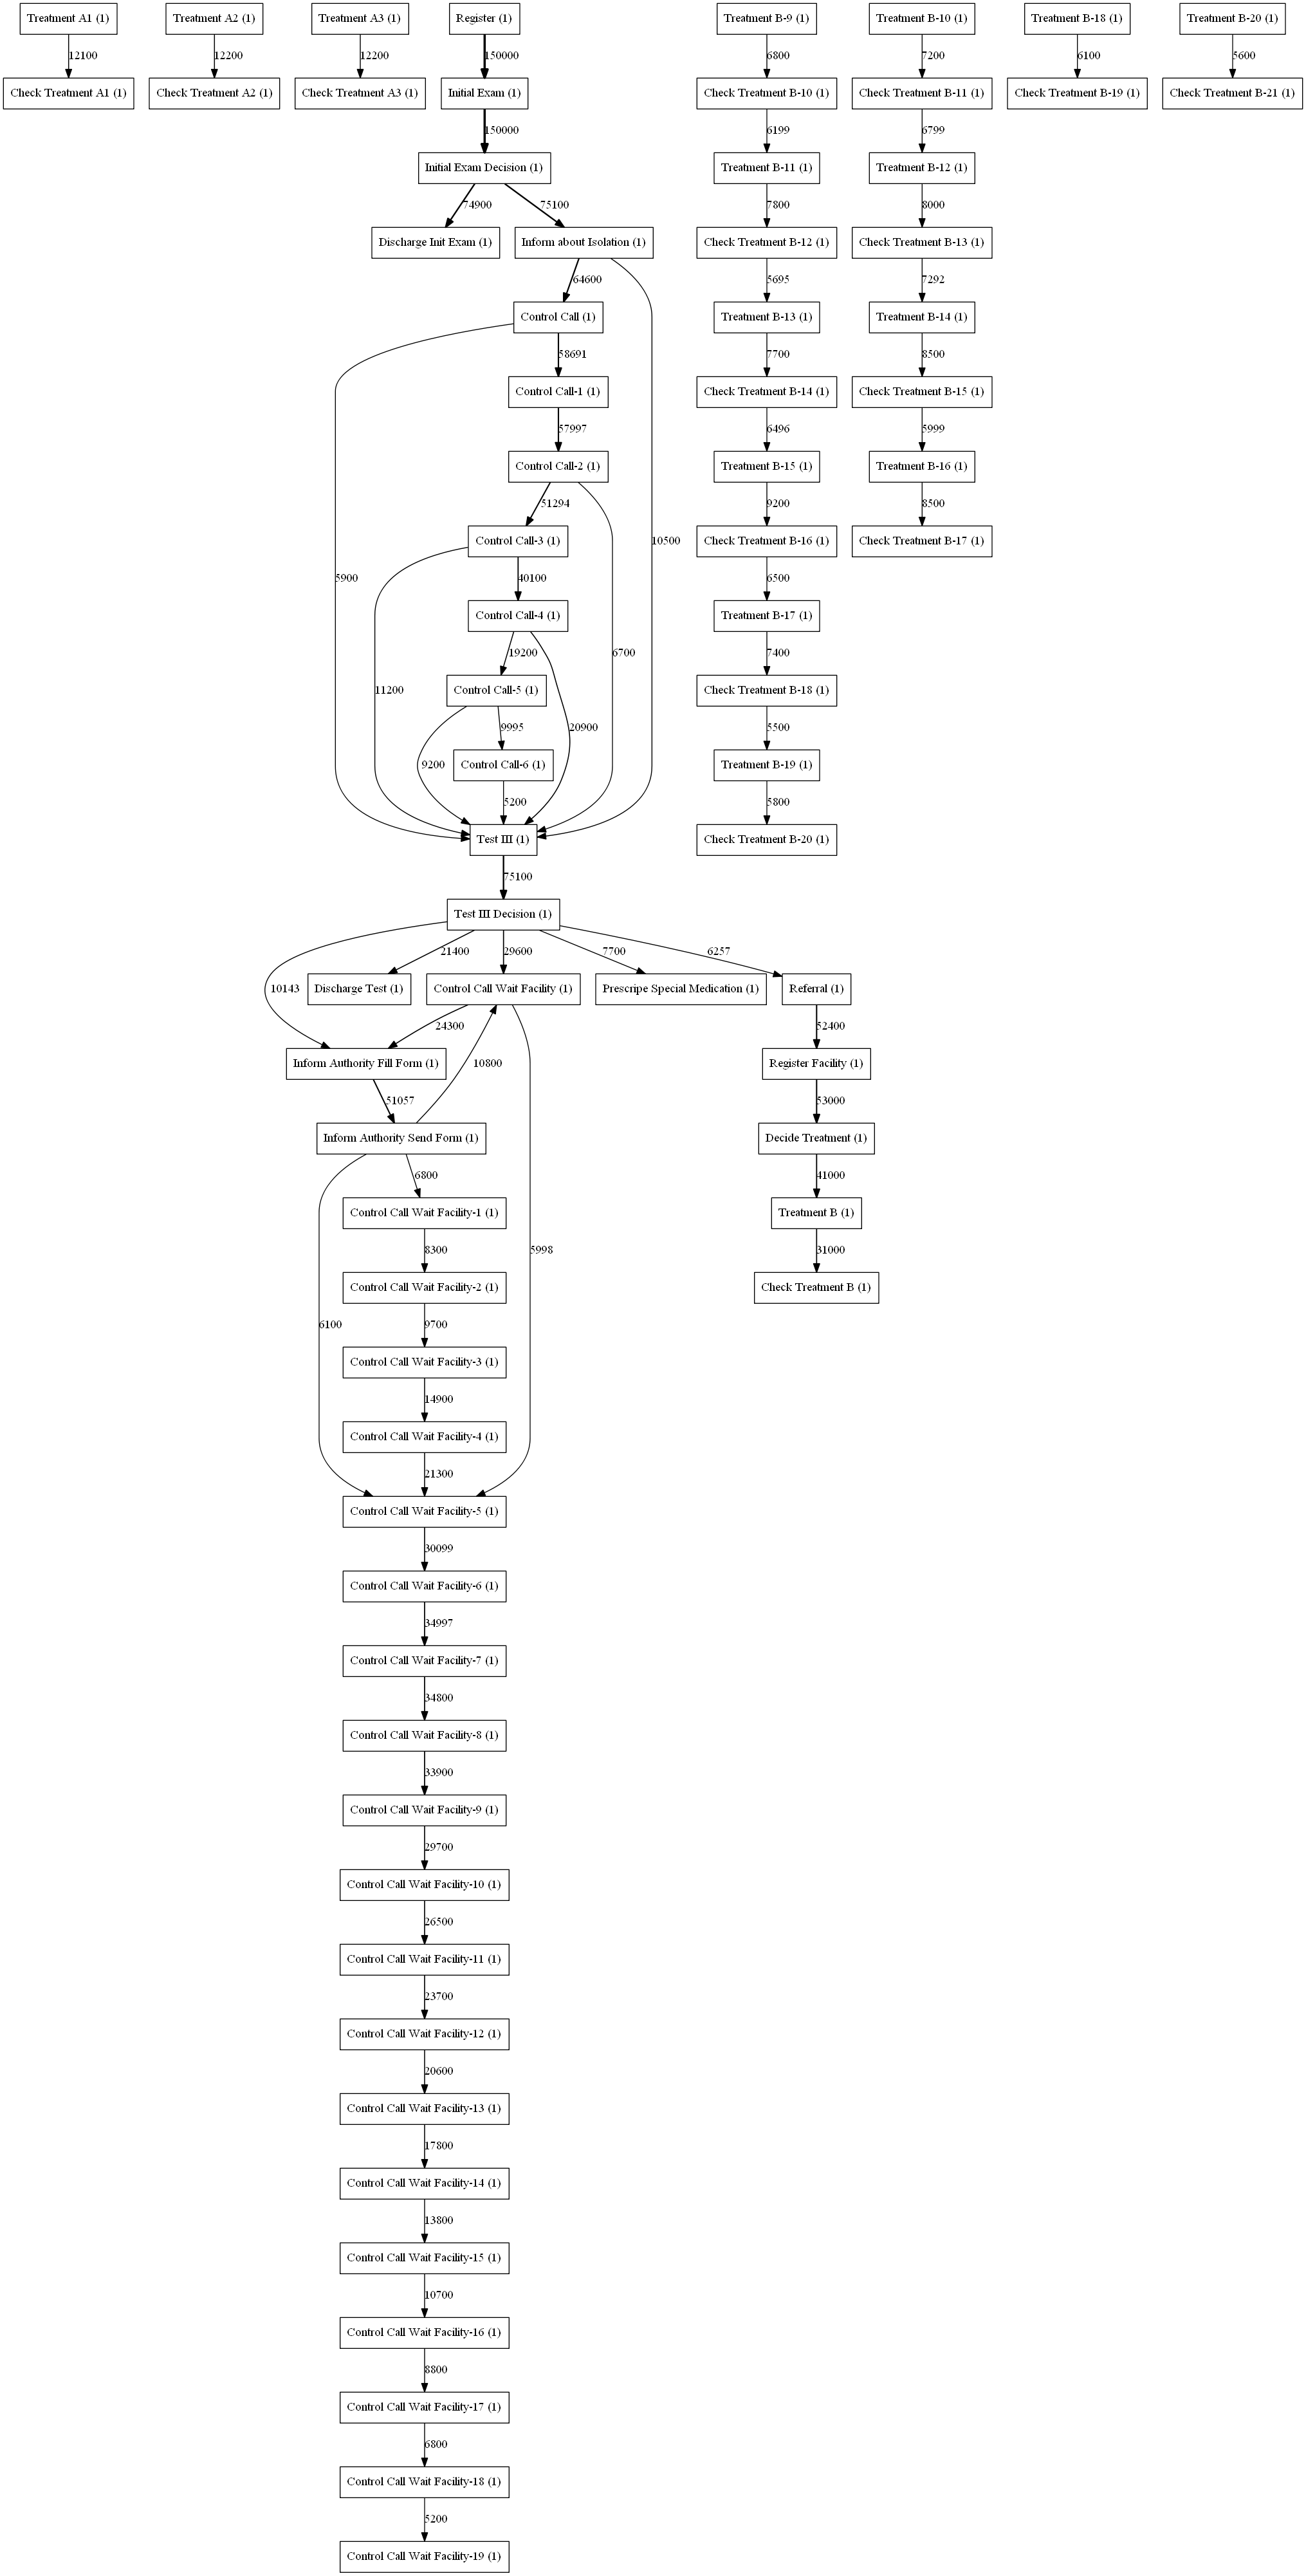

C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:25: DeprecatedWarning: save is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:28: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead (conversion/dfg/factory)
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:29: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:30: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.


C:\Users\Comberek\Anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:31: DeprecatedWarning: save is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.


In [69]:
# Import libraries
import os
import csv
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.objects.conversion.dfg import factory as dfg_mining_factory
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory
from pm4py.visualization.petrinet import factory as pn_vis_factory


# Preprocessing of the input file
with open('mapreduce_output/assignment2-6b.txt') as file:
    file_reader = csv.reader(file, delimiter='\t')
    dfg = dict()
    for row in file_reader:
        _from,_to=row[0].split(',')
        rel = (_from,_to)
        freq = int(row[1])
        dfg[rel] = freq

        
# Visualize Directly-follows-graph (DFG)
gviz = dfg_vis_factory.apply(dfg, variant='frequency')
dfg_vis_factory.view(gviz)
dfg_vis_factory.save(gviz, "Exported_viz/dfg6b.png")

# Discover and Visualize Workflow-Net
net, im, fm = dfg_mining_factory.apply(dfg)
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)
pn_vis_factory.save(gviz, "Exported_viz/pt6b.png")

**Explanation:**<br>
Files with python code for mappers and reducers can be found in the submition file in the folder "assignment-code".<br>
Text files with the description of the MapReduce steps in Hadoop are located in the submition file in the folder "MapReduce_text_files".
Directly follows graph above shows some relations that are not connected to the main graph (eg. Treatment B-9), it is caused by the file generator, as advised on the Moodle forum, we decided no to change the generator code, and leave it as it is, as it does not have an impact on the end results.

### Performance Analysis

(c) Calculate the total service time for each case using MapReduce algorithms. Explain how you calculate the total service time for each case with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Result: total service times for cases (as text file)
    
Important! Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), 3), and 4) should be submitted as outputs.


**Explanation:**<br>
1) Mapper for perfromance analysis only reads through the input, and emits key-value pairs, where key is a case id, and value is the service time of the given activity.<br><br>
2) Performance analysis reducer, as an input will have sorted key-value pairs, it will read them one by one, and for the same key (case id) will sume its values (service time). When it reaches the last activity in the case, it emits key-value pair, where key is case id, and value is the sum of service times.<br><br>
3) Hadoop commands for MapReduce calculation

**Copying python files from local disk to docker**<br>
docker cp "D:\Dysk Google\aaData Science RWTH\Semester 2\Introduction to Data Science\Assignment 2\assignment-code/" 259af2b87511:/usr/local/hadoop/<br>

**Run MapReduce**<br>
hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.4.jar \\<br>
-file /usr/local/hadoop/assignment-code/performance_mapper.py \\<br>
-mapper "python performance_mapper.py" \\<br>
-file /usr/local/hadoop/assignment-code/performance_reducer.py \\<br>
-reducer "python performance_reducer.py" \\<br>
-input "/input/(ATM)-final-log.tsv" \\<br>
-output /output/Assignment2-6c/ <br>

**Copying output file to the container**<br>
hadoop fs -copyToLocal /output/Assignment2-6c/part-00000 /usr/local/hadoop/assignment2-6c.txt

**Copying output file to the local filesystem**<br>
docker cp 259af2b87511:/usr/local/hadoop/assignment2-6c.txt "D:\Dysk Google\aaData Science RWTH\Semester 2\Introduction to Data Science\Assignment 2\output"

4) File is included in the assignment files, in the *output* folder, and is named *assignment2-6c.txt*.

(d) Visualize 1000 cases with the longest total service time using any chart.

In [70]:
import pandas as pd
#creating empty list for the data
performance_data = []

#reading output of the MapReduce
with open('mapreduce_output/assignment2-6c.txt') as file:
    file_reader = csv.reader(file, delimiter='\t')
    for row in file_reader:
        performance_data.append(row)

#converting data list into pandas dataframe
performance_df = pd.DataFrame(performance_data, columns=['case', 'service_time'])
#sorting values
performance_df = performance_df.sort_values('service_time', ascending=False)

In [71]:
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import rcParams
import matplotlib.pyplot as plt

#plotting the data
plot = sns.displot(data=performance_df.head(1000), x="service_time")
plt.title("Frequency of the longest cases")
plot.set_xticklabels(rotation=30);
#Saving the figure
plt.savefig('Exported_viz/performance_analysis.png')


**Explanation:**<br>
We can see that for longest 1000 cases, values are evenly distributed, each total service time occured 100 times. The reason for that is that in the file generation for this task, we created 100 files, with some random noise around case id and age. That eventually were copies of the original file. In the original log, each of these cases occured only once.